In [4]:
!pip3 install python-Levenshtein==0.12.0

Defaulting to user installation because normal site-packages is not writeable
  Using cached python_Levenshtein-0.12.0-cp39-cp39-macosx_11_0_arm64.whl
Reason for being yanked: Insecure, upgrade to 0.12.1


In [1]:
!pip install -e .

Defaulting to user installation because normal site-packages is not writeable
Obtaining file:///Users/sagarm2/Documents/OpticalPooledscreen/OpticalPooledScreens_2019-master
  Preparing metadata (setup.py) ... done
  Attempting uninstall: ops-lasagna
    Found existing installation: ops-lasagna 0.1
    Uninstalling ops-lasagna-0.1:
      Successfully uninstalled ops-lasagna-0.1
  Running setup.py develop for ops-lasagna


In [2]:
def matplotCreation(img,x,y,stride):
    from matplotlib import pyplot as plt
    plt.imshow(img[x:x+stride,y:y+stride], interpolation='nearest')
    plt.rcParams['figure.figsize'] = [8, 6]
    plt.rcParams['figure.dpi'] = 100 # 200 e.g. is really fine, but slower
    plt.show()
    return plt

def matplotCreation3(img,x,y,stride):
    from matplotlib import pyplot as plt
    plt.imshow(img[x:x+stride,y:y+stride,...], interpolation='nearest')
    plt.rcParams['figure.figsize'] = [8, 6]
    plt.rcParams['figure.dpi'] = 100 # 200 e.g. is really fine, but slower
    plt.show()
    return plt


def matplotCreationWhole(img):
    from matplotlib import pyplot as plt
    plt.imshow(img, interpolation='nearest')
    plt.rcParams['figure.figsize'] = [8, 6]
    plt.rcParams['figure.dpi'] = 100 # 200 e.g. is really fine, but slower
    plt.show()
    return plt
    

In [3]:
from ops.imports import *
from ops.process import Align
import ops.firesnake
from ops.firesnake import Snake
import cv2
import tifffile

import nd2


# runs example from example_data/ sub-directory of project
home = os.path.dirname(os.path.dirname(ops.__file__))
os.chdir(os.path.join(home, 'example_data'))

df_design = pd.read_csv('design.csv')

THRESHOLD_READS = 5
THRESHOLD_STD = 5

THRESHOLD_DAPI = 50 # got from ImageJ DAPI image
#THRESHOLD_CELL = 800
THRESHOLD_CELL = 12
#NUCLEUS_AREA = 0.25*150, 0.25*800
NUCLEUS_AREA = 0.25*10, 0.25*3500
#WILDCARDS = dict(well='A1', tile='107') # this one was the original but does not have the phenotype file
WILDCARDS = dict(well='A1', tile='7')

In [6]:
search = 'inputIsa/*.tif'
input_files = natsorted(glob(search))
for f in input_files:
    print(f)


inputIsa/Composite01.tif
inputIsa/Composite02.tif
inputIsa/Composite03.tif
inputIsa/Composite04.tif
inputIsa/Composite05.tif


In [285]:
##### reading RPE folder directory
import os

# Specify the directory path
directory_path = '/Users/sagarm2/Documents/12CycleData/230322_MiSeq_4C_ISS_Test_3/HCT/'
#directory_path = '/Users/sagarm2/Documents/12CycleData/230322_MiSeq_4C_ISS_Test_3/HTC/'

# Get all the subfolder names in the directory
subfolders = [f.path for f in os.scandir(directory_path) if f.is_dir()]

# Print the subfolder names

subfolders.sort(key=None, reverse=False)
subfolders


['/Users/sagarm2/Documents/12CycleData/230322_MiSeq_4C_ISS_Test_3/HCT/20230322_162942_269_HCT116_ISS01',
 '/Users/sagarm2/Documents/12CycleData/230322_MiSeq_4C_ISS_Test_3/HCT/20230323_113444_958_HCT116_ISS02',
 '/Users/sagarm2/Documents/12CycleData/230322_MiSeq_4C_ISS_Test_3/HCT/20230324_164819_487_HCT116_ISS03',
 '/Users/sagarm2/Documents/12CycleData/230322_MiSeq_4C_ISS_Test_3/HCT/20230327_140447_863_HCT116_ISS04',
 '/Users/sagarm2/Documents/12CycleData/230322_MiSeq_4C_ISS_Test_3/HCT/20230327_165132_249_HCT116_ISS05',
 '/Users/sagarm2/Documents/12CycleData/230322_MiSeq_4C_ISS_Test_3/HCT/20230328_114606_621_HCT116_ISS06',
 '/Users/sagarm2/Documents/12CycleData/230322_MiSeq_4C_ISS_Test_3/HCT/20230328_135301_119_HCT116_ISS07',
 '/Users/sagarm2/Documents/12CycleData/230322_MiSeq_4C_ISS_Test_3/HCT/20230328_155852_978_HCT116_ISS08',
 '/Users/sagarm2/Documents/12CycleData/230322_MiSeq_4C_ISS_Test_3/HCT/20230328_172625_894_HCT116_ISS09',
 '/Users/sagarm2/Documents/12CycleData/230322_MiSeq_4C_

In [353]:
############# input generation
dataRPE = np.zeros((12, 5, 2304, 2304))


indexInCycle = 4 #FGHIJK (Wells)
placeInSeries = 0 # this means 0th value from the series is read. The nd2 file has 16 FOV with each with 5 channel
nd2fileAll = np.zeros((12, 5, 2304, 2304))

### first 3 cycles to take care of mismatch of order

for i in range(3): #number of cycles
    searchRPE=subfolders[i]+"/*.nd2"
    input_files = natsorted(glob(searchRPE))
    
    print(input_files[indexInCycle])
    nd2file=nd2.imread(input_files[indexInCycle])
    temp = nd2file[placeInSeries]

    
    
    newIm = np.zeros((5, 2304, 2304))
    newIm[0] = temp[4]
    newIm[1] = temp[0]
    newIm[2] = temp[2]
    newIm[3] = temp[1]
    newIm[4] = temp[3]
    
    print(nd2file.shape)
    dataRPE[i,] = newIm
    
    
### from cycle 3 to 12
for i in range(3,12):
    searchRPE=subfolders[i]+"/*.nd2"
    input_files = natsorted(glob(searchRPE))
    print(input_files[indexInCycle])
    nd2file=nd2.imread(input_files[indexInCycle])
    #print(nd2file.shape)
    dataRPE[i,] = nd2file[placeInSeries]


/Users/sagarm2/Documents/12CycleData/230322_MiSeq_4C_ISS_Test_3/HCT/20230322_162942_269_HCT116_ISS01/WellJ16_ChannelMiSeq G,MiSeq A,MiSeq T,MiSeq C,DAPI_Seq0010.nd2
(16, 5, 2304, 2304)
/Users/sagarm2/Documents/12CycleData/230322_MiSeq_4C_ISS_Test_3/HCT/20230323_113444_958_HCT116_ISS02/WellJ16_ChannelMiSeq G,MiSeq A,MiSeq T,MiSeq C,DAPI_Seq0004.nd2
(16, 5, 2304, 2304)
/Users/sagarm2/Documents/12CycleData/230322_MiSeq_4C_ISS_Test_3/HCT/20230324_164819_487_HCT116_ISS03/WellJ16_ChannelMiSeq G,MiSeq A,MiSeq T,MiSeq C,DAPI_Seq0004.nd2
(16, 5, 2304, 2304)
/Users/sagarm2/Documents/12CycleData/230322_MiSeq_4C_ISS_Test_3/HCT/20230327_140447_863_HCT116_ISS04/WellJ16_ChannelDAPI,MiSeq G,MiSeq T,MiSeq A,MiSeq C_Seq0004.nd2
/Users/sagarm2/Documents/12CycleData/230322_MiSeq_4C_ISS_Test_3/HCT/20230327_165132_249_HCT116_ISS05/WellJ16_ChannelDAPI,MiSeq G,MiSeq T,MiSeq A,MiSeq C_Seq0004.nd2
/Users/sagarm2/Documents/12CycleData/230322_MiSeq_4C_ISS_Test_3/HCT/20230328_114606_621_HCT116_ISS06/WellJ16_Channe

In [45]:
input_files = natsorted(glob(searchRPE))

In [412]:
inputNd2='/Users/sagarm2/Documents/12CycleData/230322_MiSeq_4C_ISS_Test_3/HCT/20230322_162942_269_HCT116_ISS01/WellJ16_ChannelMiSeq G,MiSeq A,MiSeq T,MiSeq C,DAPI_Seq0010.nd2'

In [414]:
parse(inputNd2)

ValueError: failed to parse filename: /Users/sagarm2/Documents/12CycleData/230322_MiSeq_4C_ISS_Test_3/HCT/20230322_162942_269_HCT116_ISS01/WellJ16_ChannelMiSeq G,MiSeq A,MiSeq T,MiSeq C,DAPI_Seq0010.nd2

In [415]:
description= {'subdir': 'process_ipynb', 'mag': '10X', 'well': 'A1', 'tile': '7', 'tag': 'sbs', 'ext': 'tif', 'file': 'input2/10X_c1-SBS-1/10X_c1-SBS-1_A1_Tile-7.sbs.tif'}

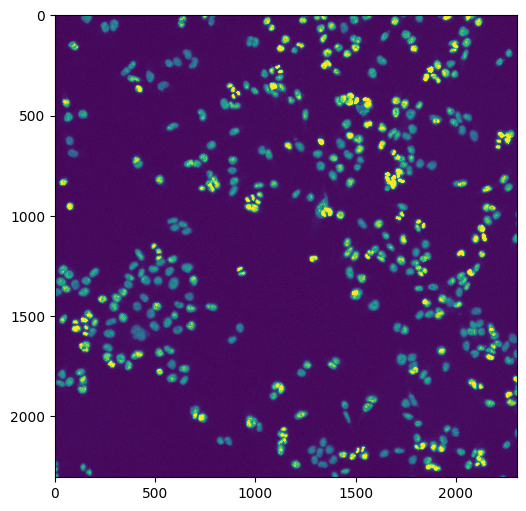

<module 'matplotlib.pyplot' from '/Library/Python/3.9/site-packages/matplotlib/pyplot.py'>

In [289]:
dataRPE.shape
matplotCreationWhole(dataRPE[2,0])

In [127]:
def getBarcodeFromData(data):
    aligned = Snake._align_SBS(data, method='DAPI')
    loged = Snake._transform_log(aligned, skip_index=0)
    maxed = Snake._max_filter(loged, 3, remove_index=0)
    std = Snake._compute_std(loged, remove_index=0)
    peaks = Snake._find_peaks(std)

    THRESHOLD_DAPI = 800 # got from ImageJ DAPI image
    NUCLEUS_AREA = 0.25*20, 0.25*35000 #analyze particles imagej

    nuclei = Snake._segment_nuclei(data[0], THRESHOLD_DAPI,
    area_min=NUCLEUS_AREA[0], area_max=NUCLEUS_AREA[1])

    THRESHOLD_CELL = 300
    cells = Snake._segment_cells(data[0], nuclei, THRESHOLD_CELL)
    
    THRESHOLD_STD = 60
    # 60 for RPE and HTC

    df_bases, index, values, labels, positions = Snake._extract_bases(maxed, peaks, cells, 
                        THRESHOLD_STD, wildcards=WILDCARDS, bases='GTAC')
        
    df_reads = Snake._call_reads(df_bases) # does the quality Q index calculation
    
    df_cells = Snake._call_cells(df_reads)
    
    #rt=df_cells['cell_barcode_0'].value_counts() # distribution of barcodes
    
    return df_cells

In [255]:
def inputGeneration(indexInCycle, placeInSeries):

    ############# input generation
    dataRPE = np.zeros((12, 5, 2304, 2304))


    #indexInCycle = 0 #FGHIJK (Wells)
    #placeInSeries = 7 # this means 0th value from the series is read. The nd2 file has 16 FOV with each with 5 channel
    nd2fileAll = np.zeros((12, 5, 2304, 2304))

    ### first 3 cycles to take care of mismatch of order

    for i in range(3): #number of cycles
        searchRPE=subfolders[i]+"/*.nd2"
        input_files = natsorted(glob(searchRPE))
    
        print(input_files[indexInCycle])
        nd2file=nd2.imread(input_files[indexInCycle])
        temp = nd2file[placeInSeries]

    
    
        newIm = np.zeros((5, 2304, 2304))
        newIm[0] = temp[4]
        newIm[1] = temp[0]
        newIm[2] = temp[2]
        newIm[3] = temp[1]
        newIm[4] = temp[3]
    
        print(nd2file.shape)
        dataRPE[i,] = newIm
    
    
### from cycle 3 to 12
    for i in range(3,12):
        searchRPE=subfolders[i]+"/*.nd2"
        input_files = natsorted(glob(searchRPE))
        print(input_files[indexInCycle])
        nd2file=nd2.imread(input_files[indexInCycle])
        #print(nd2file.shape)
        dataRPE[i,] = nd2file[placeInSeries]
    
    
    return dataRPE

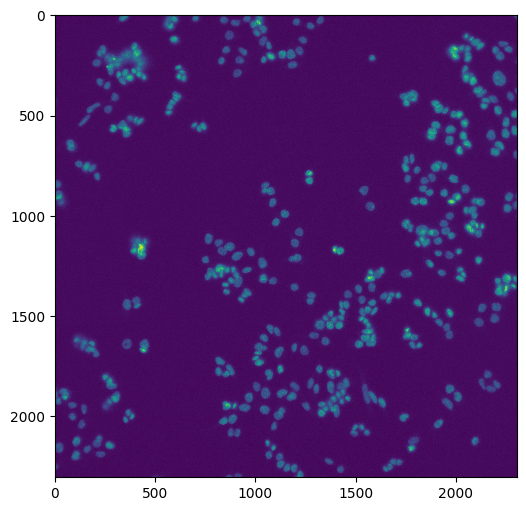

<module 'matplotlib.pyplot' from '/Library/Python/3.9/site-packages/matplotlib/pyplot.py'>

In [360]:
matplotCreationWhole(data[3,0])

In [361]:
print(np.mean(dataRPE[0,0]))
print(np.min(dataRPE[0,0]))
print(np.max(dataRPE[0,0]))

467.3023994351611
105.0
4095.0


In [362]:
print(np.mean(data[0,0]))
print(np.min(data[0,0]))
print(np.max(data[0,0]))

467.3023994351611
105
4095


In [365]:
print(data.shape)
dataRPE[0,0]

(12, 5, 2304, 2304)


array([[ 194.,  137.,  177., ...,  176.,  178.,  195.],
       [ 185.,  252.,  200., ...,  204.,  180.,  185.],
       [ 214.,  240.,  202., ...,  207.,  208.,  167.],
       ...,
       [ 750.,  650.,  783., ...,  165.,  221.,  193.],
       [ 663.,  749.,  807., ...,  211.,  205.,  180.],
       [ 773.,  755., 1025., ...,  198.,  174.,  201.]])

In [316]:
nd2file=nd2.imread(input_files[0]) #cycle 0
print(input_files[0])

#for i in range(12):
    #arr[i,]=nd2file[0];

(5, 2304, 2304)
/Users/sagarm2/Documents/12CycleData/230322_MiSeq_4C_ISS_Test_3/RPE/20230322_162942_269_RPE_ISS01/*.nd2


In [304]:

dataRPE = np.zeros((12, 5, 2304, 2304))
arr[0,]=nd2file[0];
arr.shape


(12, 5, 2304, 2304)

In [75]:
######
#search = '/Users/sagarm2/Documents/12CycleData/230322_MiSeq_4C_ISS_Test_3/HCT/HCT1Cycle/*.tif'
# search = '/Users/sagarm2/Documents/12CycleData/230322_MiSeq_4C_ISS_Test_3/RPE/RPE12_G14/*.tif'
search = '/Users/sagarm2/Documents/12CycleData/230322_MiSeq_4C_ISS_Test_3/RPE_FOvs/RPE12_G14/*.tif'

#search = '/Users/sagarm2/Documents/12CycleData/230322_MiSeq_4C_ISS_Test_3/U2OS/12Cycle/*.tif'


input_files = natsorted(glob(search))
for f in input_files:
    print(f)


/Users/sagarm2/Documents/12CycleData/230322_MiSeq_4C_ISS_Test_3/RPE_FOvs/RPE12_G14/ISS01_G14_RPE.tif
/Users/sagarm2/Documents/12CycleData/230322_MiSeq_4C_ISS_Test_3/RPE_FOvs/RPE12_G14/ISS02_G14_RPE.tif
/Users/sagarm2/Documents/12CycleData/230322_MiSeq_4C_ISS_Test_3/RPE_FOvs/RPE12_G14/ISS03_G14_RPE.tif
/Users/sagarm2/Documents/12CycleData/230322_MiSeq_4C_ISS_Test_3/RPE_FOvs/RPE12_G14/ISS04_G14_RPE.tif
/Users/sagarm2/Documents/12CycleData/230322_MiSeq_4C_ISS_Test_3/RPE_FOvs/RPE12_G14/ISS05_G14_RPE.tif
/Users/sagarm2/Documents/12CycleData/230322_MiSeq_4C_ISS_Test_3/RPE_FOvs/RPE12_G14/ISS06_G14_RPE.tif
/Users/sagarm2/Documents/12CycleData/230322_MiSeq_4C_ISS_Test_3/RPE_FOvs/RPE12_G14/ISS07_G14_RPE.tif
/Users/sagarm2/Documents/12CycleData/230322_MiSeq_4C_ISS_Test_3/RPE_FOvs/RPE12_G14/ISS08_G14_RPE.tif
/Users/sagarm2/Documents/12CycleData/230322_MiSeq_4C_ISS_Test_3/RPE_FOvs/RPE12_G14/ISS09_G14_RPE.tif
/Users/sagarm2/Documents/12CycleData/230322_MiSeq_4C_ISS_Test_3/RPE_FOvs/RPE12_G14/ISS10_G1

In [368]:
####### only use whn multi cycle mode

data=dataRPE.astype(np.uint16) ## data type converted to uint16 from float. ImageJ converted images are read as uint16
# the nd2 reader will read as float64
#dataRPE1=dataRPE.astype(np.uint16)


In [357]:
print(np.max(data[0,0]))

4095


In [381]:
#####
aligned = Snake._align_SBS(data, method='DAPI')

In [367]:
###### imageJ read data  #### DONOTRUN 
data = np.array([read(f) for f in input_files])
aligned = Snake._align_SBS(data, method='DAPI')

TiffFileError: not a TIFF file

In [382]:
######
loged = Snake._transform_log(aligned, skip_index=0)
#matplotCreationWhole(loged)

(12, 5, 2304, 2304)


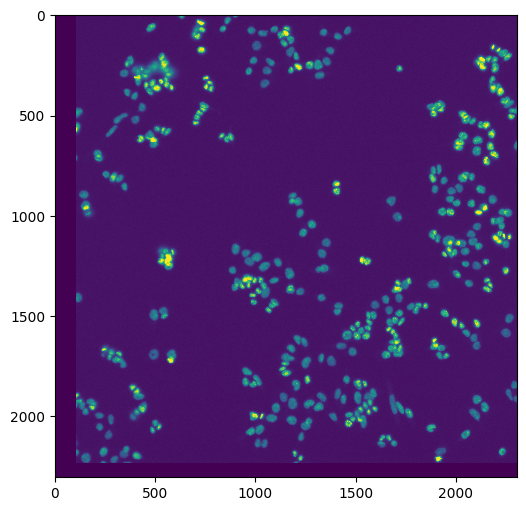

<module 'matplotlib.pyplot' from '/Library/Python/3.9/site-packages/matplotlib/pyplot.py'>

In [383]:
print(aligned.shape)
matplotCreationWhole(aligned[5,0])

In [384]:
######
maxed = Snake._max_filter(loged, 3, remove_index=0)

In [111]:
import sys
print(sys.executable)
print(sys.version)
print(sys.version_info)

/Library/Developer/CommandLineTools/usr/bin/python3
3.9.6 (default, Mar 10 2023, 20:16:38) 
[Clang 14.0.3 (clang-1403.0.22.14.1)]
sys.version_info(major=3, minor=9, micro=6, releaselevel='final', serial=0)


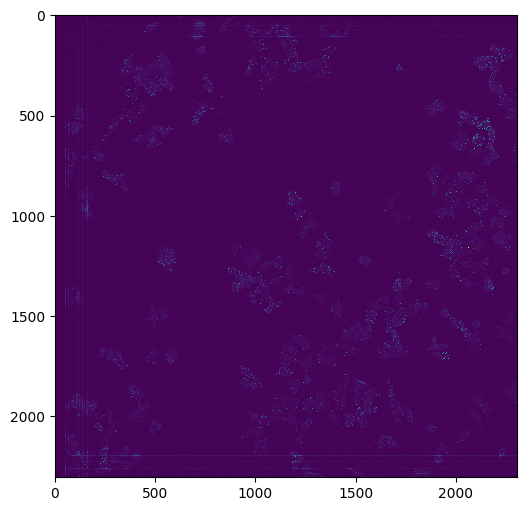

<module 'matplotlib.pyplot' from '/Library/Python/3.9/site-packages/matplotlib/pyplot.py'>

In [385]:
#####
std = Snake._compute_std(loged, remove_index=0)
matplotCreationWhole(std)


In [156]:
import tifffile

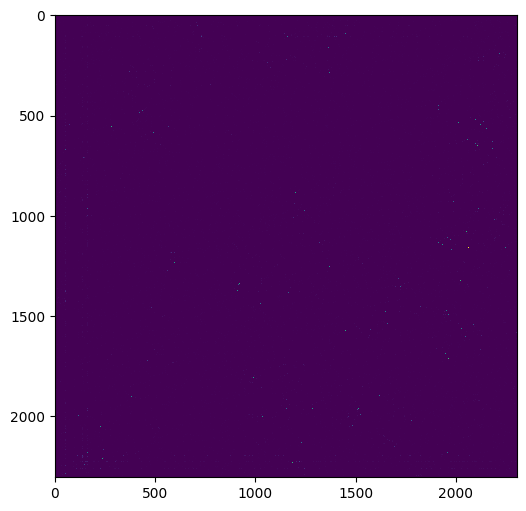

<module 'matplotlib.pyplot' from '/Library/Python/3.9/site-packages/matplotlib/pyplot.py'>

In [386]:
#######
peaks = Snake._find_peaks(std)
matplotCreationWhole(peaks)

In [157]:
tifffile.imwrite('PeaksFile.tif', peaks)

In [72]:
data.shape

(12, 5, 2304, 2304)

In [387]:
########

THRESHOLD_DAPI = 800 # got from ImageJ DAPI image
NUCLEUS_AREA = 0.25*20, 0.25*35000 #analyze particles imagej

nuclei = Snake._segment_nuclei(data[0], THRESHOLD_DAPI,
 area_min=NUCLEUS_AREA[0], area_max=NUCLEUS_AREA[1])

#fillholes

In [94]:
print(type(np.max(data[0])))
print(type(np.max(dataRPE[0])))

<class 'numpy.uint16'>
<class 'numpy.float64'>


In [97]:
dataRPE1=dataRPE.astype(np.uint16)

In [104]:
print((np.min(data[0])))
print((np.min(dataRPE1[0])))

80
77


(2304, 2304)


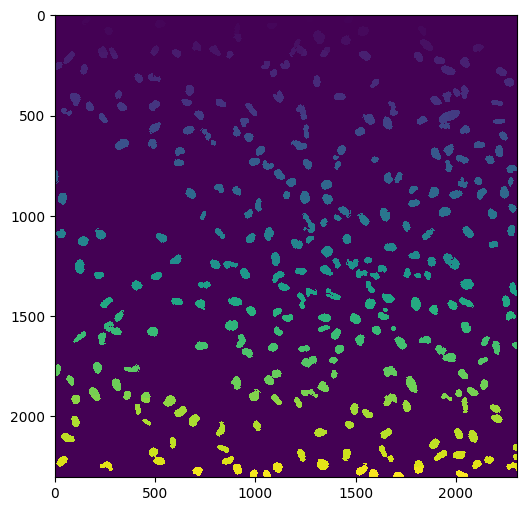

<module 'matplotlib.pyplot' from '/Library/Python/3.9/site-packages/matplotlib/pyplot.py'>

In [225]:
print(cells.shape)
matplotCreationWhole(nuclei)

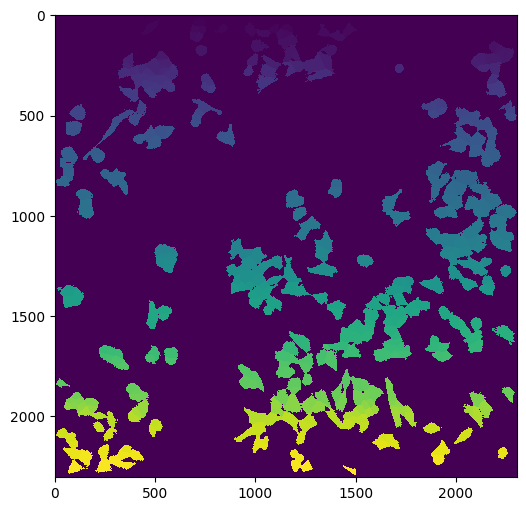

<module 'matplotlib.pyplot' from '/Library/Python/3.9/site-packages/matplotlib/pyplot.py'>

In [388]:
#########
THRESHOLD_CELL = 300
cells = Snake._segment_cells(data[0], nuclei, THRESHOLD_CELL)
matplotCreationWhole(cells)

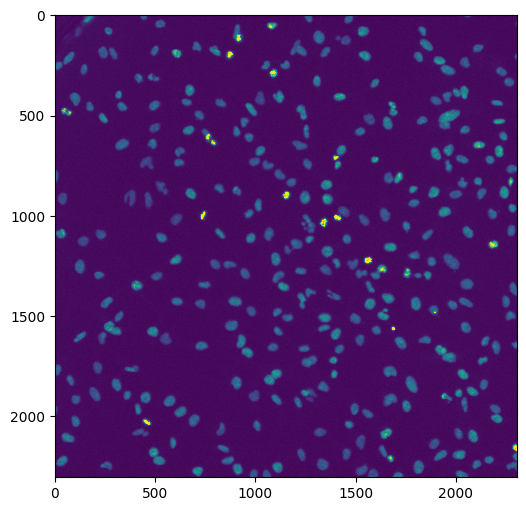

In [228]:
matplotCreationWhole(data[0,0])
tifffile.imwrite('CellImageBeforesegmentation.tif', data[0,1])

In [19]:
# saving cells and nuclei image
import matplotlib.pyplot as plt
#image = cv2.cvtColor(loged, cv2.)

tifffile.imwrite('nucleiImage.tif', nuclei)
tifffile.imwrite('CellImage.tif', cells)

In [389]:
##########
THRESHOLD_STD = 60



# 60 for RPE and HTC

df_bases, index, values, labels, positions = Snake._extract_bases(maxed, peaks, cells, 
                        THRESHOLD_STD, wildcards=WILDCARDS, bases='GTAC')

#GCAT for 5 cycle images
#GTAC for 12 cycle images

test
see if this work


In [45]:
print(index)
print(df_bases)
print("after clean up ")
df_temp_sorted=df_bases.sort_values(["well", "tile", "cell", "read", "cycle", "channel"]);
print(df_temp_sorted)

(('cycle', [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12]), ('channel', ['G', 'A', 'T', 'C']))
          read  cycle channel  intensity  cell     i     j tile well
0            0      1       A         15     0     5  1093    7   A1
1            0      1       C         22     0     5  1093    7   A1
2            0      1       G          1     0     5  1093    7   A1
3            0      1       T         20     0     5  1093    7   A1
4            0      2       A          0     0     5  1093    7   A1
...        ...    ...     ...        ...   ...   ...   ...  ...  ...
1683979  35082     11       T          0  2847  2287  2213    7   A1
1683980  35082     12       A          0  2847  2287  2213    7   A1
1683981  35082     12       C          0  2847  2287  2213    7   A1
1683982  35082     12       G          0  2847  2287  2213    7   A1
1683983  35082     12       T          0  2847  2287  2213    7   A1

[1689168 rows x 9 columns]
after clean up 
          read  cycle channel  intensity

In [310]:
print(df_bases)

        read  cycle channel  intensity  cell     i     j tile well
0          0      1       A          7     0     5   859    7   A1
1          0      1       C         15     0     5   859    7   A1
2          0      1       G        353     0     5   859    7   A1
3          0      1       T        140     0     5   859    7   A1
4          0      2       A          0     0     5   859    7   A1
...      ...    ...     ...        ...   ...   ...   ...  ...  ...
142699  2972     11       T          0   593  2273  1871    7   A1
142700  2972     12       A         10   593  2273  1871    7   A1
142701  2972     12       C         19   593  2273  1871    7   A1
142702  2972     12       G         59   593  2273  1871    7   A1
142703  2972     12       T         42   593  2273  1871    7   A1

[143952 rows x 9 columns]


In [390]:
########
df_reads = Snake._call_reads(df_bases) # does the quality Q index calculation
filename = name(description, tag='reads', ext='csv')

printing X sent to medians
[[[ 24  43  22  37]
  [  0   0   0   0]
  [ 48  63  26  12]
  ...
  [ 25  21  26  24]
  [  7  35   5  96]
  [ 83  50  21   0]]

 [[ 56  81   7  77]
  [  0   0   0   0]
  [137  41  21  51]
  ...
  [114  73  13  73]
  [172 115  56 191]
  [163 136  37  96]]

 [[ 30  92  16  87]
  [  0   0   0   0]
  [ 84  80   7  20]
  ...
  [ 86  80  10  44]
  [148 121  45  94]
  [ 61  94  16  99]]

 ...

 [[  4  15 178  84]
  [  0   0   0   0]
  [  0   0   0   0]
  ...
  [  0   0   0   0]
  [  0   0   0   0]
  [139 187  82 228]]

 [[ 13  38 436 215]
  [474 144  16  22]
  [  0   0   0   0]
  ...
  [ 74  74 117  89]
  [  0   0   0   0]
  [  7  40  93  46]]

 [[ 22  44  11  13]
  [  3  31  19   9]
  [  0   0   0   0]
  ...
  [  0  35   4   5]
  [  0   0   0   0]
  [258 398  65 282]]]
before call barcode
        read  cycle channel  intensity  cell     i     j tile well
0          0      1       A         29     0     5   611    7   A1
1          0      1       C         45     0 

NameError: name 'description' is not defined

In [309]:
print(df_reads)

        read  cell     i     j tile well       barcode       Q_0       Q_1  \
0          0     0     5   859    7   A1  GAGAATAAAGCG  0.852206  0.000000   
48         1     0     5  1433    7   A1  GAGAATAAAGAG  1.000000  0.000000   
96         2     0     5  1440    7   A1  GAGAATAAAACG  0.941472  0.000000   
144        3     0     7  1445    7   A1  TAGAATAAAAAC  0.024587  0.000000   
192        4     0     7  1473    7   A1  GACAACAAAAGC  0.307318  0.000000   
...      ...   ...   ...   ...  ...  ...           ...       ...       ...   
141792  2954   593  2253  1902    7   A1  GAATTACCGGAG  1.000000  0.874585   
141936  2957   593  2257  1852    7   A1  GAATTAAAGGAG  0.697179  0.555635   
142368  2966   593  2266  1860    7   A1  TTAAAACCTAAC  0.072479  0.293820   
142416  2967   593  2266  1870    7   A1  AGAAAACTAAAA  0.215277  0.108500   
142656  2972   593  2273  1871    7   A1  GAATTAACGGAG  0.514555  0.772539   

             Q_2       Q_3       Q_4       Q_5       Q_6       

In [233]:
df_bases.to_csv('cellBaseRead.csv',index=False)

In [234]:
df_reads.to_csv('cellReads.csv',index=False)

In [391]:
##########
df_cells = Snake._call_cells(df_reads)

In [392]:
print(df_cells[1:15])

      cell tile well cell_barcode_0  cell_barcode_count_0 cell_barcode_1  \
480      6    7   A1   TACAAAAAATAA                     1   CAGAATCAATAT   
528      7    7   A1   GATGATCATAGT                     1   GATAATCATAGT   
1200     8    7   A1   GACGACAAGAGA                     1   CACGACAAGAGA   
1344     9    7   A1   GATGACCATAGA                     1            NaN   
672     10    7   A1   GACGTCAAGAGA                     3   GACGACAAGAGA   
864     11    7   A1   GAAGAAGAATTC                     1            NaN   
624     12    7   A1   GACGTCAAGAGC                     2   GACGACAAGAGA   
1056    13    7   A1   GAGTATAAGTAG                     1   GAGTATAAGCTA   
1440    14    7   A1   GATGATCATAGT                     2   GAGTTTCAGGCG   
1104    15    7   A1   GATGATCATAGC                     3            NaN   
1488    16    7   A1   TACTTCATGAGA                     1   GACGTCAAGAGA   
1584    17    7   A1   GACGTCAAGAGC                     2   GACGTCCAGAGA   
2832    18  

In [237]:
df_cells.to_csv('cellData.csv',index=False)

In [238]:
%reset

Once deleted, variables cannot be recovered. Proceed (y/[n])? n
Nothing done.


In [393]:
#######
rt=df_cells['cell_barcode_0'].value_counts() # distribution of barcodes

In [394]:
print(rt[1:15])

GCCGTCATGAGC    35
GCCGTCATGAGA    27
GGAGACGCCTTC    24
GAGTTTAAGGAG    23
GCCGTCCTGAGC    17
GGAGACGACTTC    16
GCGCATCAATAT    13
GGAGAAGACTTA    12
GAGTTTAAGAAG    11
GAGTTTCCGGCG    10
GGAGAAGCCTTC     9
GAGTTTAAGGCG     7
GAGTTTTAGAGC     7
GCGCATCCCTCT     7
Name: cell_barcode_0, dtype: int64


In [241]:
df_cells.shape

(395, 8)

In [395]:
dataPh=data

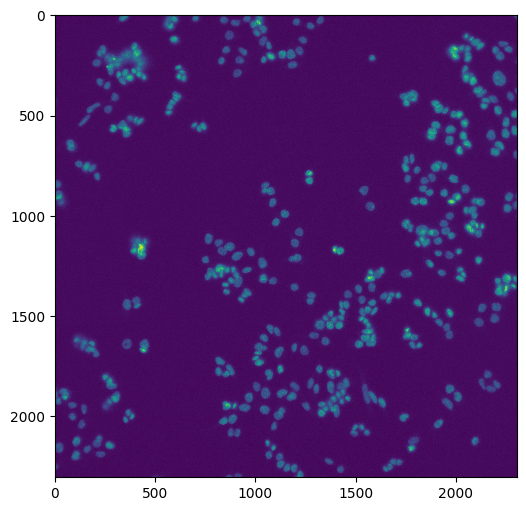

<module 'matplotlib.pyplot' from '/Library/Python/3.9/site-packages/matplotlib/pyplot.py'>

In [397]:
matplotCreationWhole(dataPh[3,0])

In [244]:
re=nd2.imread('/Users/sagarm2/Documents/12CycleData/230322_MiSeq_4C_ISS_Test_3/RPE/20230322_162942_269_RPE_ISS01/WellF14_ChannelMiSeq G,MiSeq A,MiSeq T,MiSeq C,DAPI_Seq0000.nd2')

In [245]:
re.shape

(16, 5, 2304, 2304)

In [255]:
#search = '/Users/sagarm2/Documents/12CycleData/230322_MiSeq_4C_ISS_Test_3/HCT/HCT1Cycle/*.tif'
#search = '/Users/sagarm2/Documents/12CycleData/230322_MiSeq_4C_ISS_Test_3/RPE/20230322_162942_269_RPE_ISS01/*.nd2'
search = '/Users/sagarm2/Documents/12CycleData/230322_MiSeq_4C_ISS_Test_3/RPE/20230322_162942_269_RPE_ISS01/*.nd2'
#search = '/Users/sagarm2/Documents/12CycleData/230322_MiSeq_4C_ISS_Test_3/U2OS/12Cycle/*.tif'


input_files = natsorted(glob(search))
for f in input_files:
    print(f)


/Users/sagarm2/Documents/12CycleData/230322_MiSeq_4C_ISS_Test_3/RPE/20230322_162942_269_RPE_ISS01/WellF14_ChannelMiSeq G,MiSeq A,MiSeq T,MiSeq C,DAPI_Seq0000.nd2
/Users/sagarm2/Documents/12CycleData/230322_MiSeq_4C_ISS_Test_3/RPE/20230322_162942_269_RPE_ISS01/WellG14_ChannelMiSeq G,MiSeq A,MiSeq T,MiSeq C,DAPI_Seq0001.nd2
/Users/sagarm2/Documents/12CycleData/230322_MiSeq_4C_ISS_Test_3/RPE/20230322_162942_269_RPE_ISS01/WellH14_ChannelMiSeq G,MiSeq A,MiSeq T,MiSeq C,DAPI_Seq0002.nd2
/Users/sagarm2/Documents/12CycleData/230322_MiSeq_4C_ISS_Test_3/RPE/20230322_162942_269_RPE_ISS01/WellI14_ChannelMiSeq G,MiSeq A,MiSeq T,MiSeq C,DAPI_Seq0003.nd2
/Users/sagarm2/Documents/12CycleData/230322_MiSeq_4C_ISS_Test_3/RPE/20230322_162942_269_RPE_ISS01/WellJ14_ChannelMiSeq G,MiSeq A,MiSeq T,MiSeq C,DAPI_Seq0004.nd2
/Users/sagarm2/Documents/12CycleData/230322_MiSeq_4C_ISS_Test_3/RPE/20230322_162942_269_RPE_ISS01/WellK14_ChannelMiSeq G,MiSeq A,MiSeq T,MiSeq C,DAPI_Seq0005.nd2


In [253]:
input_files[0]

'/Users/sagarm2/Documents/12CycleData/230322_MiSeq_4C_ISS_Test_3/RPE/20230322_162942_269_RPE_ISS01/WellF14_ChannelMiSeq G,MiSeq A,MiSeq T,MiSeq C,DAPI_Seq0000.nd2'

In [277]:
import os

# Specify the directory path
directory_path = '/Users/sagarm2/Documents/12CycleData/230322_MiSeq_4C_ISS_Test_3/RPE/'

# Get all the subfolder names in the directory
subfolders = [f.path for f in os.scandir(directory_path) if f.is_dir()]

# Print the subfolder names

subfolders.sort(key=None, reverse=False)
subfolders

['/Users/sagarm2/Documents/12CycleData/230322_MiSeq_4C_ISS_Test_3/RPE/20230322_162942_269_RPE_ISS01',
 '/Users/sagarm2/Documents/12CycleData/230322_MiSeq_4C_ISS_Test_3/RPE/20230323_112849_867_RPE_ISS02',
 '/Users/sagarm2/Documents/12CycleData/230322_MiSeq_4C_ISS_Test_3/RPE/20230324_163824_079_RPE_ISS03',
 '/Users/sagarm2/Documents/12CycleData/230322_MiSeq_4C_ISS_Test_3/RPE/20230327_135722_306_RPE_ISS04',
 '/Users/sagarm2/Documents/12CycleData/230322_MiSeq_4C_ISS_Test_3/RPE/20230327_164259_348_RPE_ISS05',
 '/Users/sagarm2/Documents/12CycleData/230322_MiSeq_4C_ISS_Test_3/RPE/20230328_113704_292_RPE_ISS06',
 '/Users/sagarm2/Documents/12CycleData/230322_MiSeq_4C_ISS_Test_3/RPE/20230328_134523_148_RPE_ISS07',
 '/Users/sagarm2/Documents/12CycleData/230322_MiSeq_4C_ISS_Test_3/RPE/20230328_155332_558_RPE_ISS08',
 '/Users/sagarm2/Documents/12CycleData/230322_MiSeq_4C_ISS_Test_3/RPE/20230328_172133_958_RPE_ISS09',
 '/Users/sagarm2/Documents/12CycleData/230322_MiSeq_4C_ISS_Test_3/RPE/20230329_101

In [279]:
subfolders[0]

'/Users/sagarm2/Documents/12CycleData/230322_MiSeq_4C_ISS_Test_3/RPE/20230322_162942_269_RPE_ISS01'

In [264]:
rpeDirs=[
'/Users/sagarm2/Documents/12CycleData/230322_MiSeq_4C_ISS_Test_3/RPE/20230322_162942_269_RPE_ISS01'
'/Users/sagarm2/Documents/12CycleData/230322_MiSeq_4C_ISS_Test_3/RPE/20230323_112849_867_RPE_ISS02'
'/Users/sagarm2/Documents/12CycleData/230322_MiSeq_4C_ISS_Test_3/RPE/20230324_163824_079_RPE_ISS03'
'/Users/sagarm2/Documents/12CycleData/230322_MiSeq_4C_ISS_Test_3/RPE/20230327_135722_306_RPE_ISS04'
'/Users/sagarm2/Documents/12CycleData/230322_MiSeq_4C_ISS_Test_3/RPE/20230327_164259_348_RPE_ISS05'
'/Users/sagarm2/Documents/12CycleData/230322_MiSeq_4C_ISS_Test_3/RPE/20230328_113704_292_RPE_ISS06'
'/Users/sagarm2/Documents/12CycleData/230322_MiSeq_4C_ISS_Test_3/RPE/20230328_134523_148_RPE_ISS07'
'/Users/sagarm2/Documents/12CycleData/230322_MiSeq_4C_ISS_Test_3/RPE/20230328_155332_558_RPE_ISS08'
'/Users/sagarm2/Documents/12CycleData/230322_MiSeq_4C_ISS_Test_3/RPE/20230328_172133_958_RPE_ISS09'
'/Users/sagarm2/Documents/12CycleData/230322_MiSeq_4C_ISS_Test_3/RPE/20230329_101117_299_RPE_ISS10'
'/Users/sagarm2/Documents/12CycleData/230322_MiSeq_4C_ISS_Test_3/RPE/20230329_114003_177_RPE_ISS11'
'/Users/sagarm2/Documents/12CycleData/230322_MiSeq_4C_ISS_Test_3/RPE/20230329_131111_459_RPE_ISS12'
]

In [275]:
subfolders

['/Users/sagarm2/Documents/12CycleData/230322_MiSeq_4C_ISS_Test_3/RPE/20230322_162942_269_RPE_ISS01',
 '/Users/sagarm2/Documents/12CycleData/230322_MiSeq_4C_ISS_Test_3/RPE/20230323_112849_867_RPE_ISS02',
 '/Users/sagarm2/Documents/12CycleData/230322_MiSeq_4C_ISS_Test_3/RPE/20230324_163824_079_RPE_ISS03',
 '/Users/sagarm2/Documents/12CycleData/230322_MiSeq_4C_ISS_Test_3/RPE/20230327_135722_306_RPE_ISS04',
 '/Users/sagarm2/Documents/12CycleData/230322_MiSeq_4C_ISS_Test_3/RPE/20230327_164259_348_RPE_ISS05',
 '/Users/sagarm2/Documents/12CycleData/230322_MiSeq_4C_ISS_Test_3/RPE/20230328_113704_292_RPE_ISS06',
 '/Users/sagarm2/Documents/12CycleData/230322_MiSeq_4C_ISS_Test_3/RPE/20230328_134523_148_RPE_ISS07',
 '/Users/sagarm2/Documents/12CycleData/230322_MiSeq_4C_ISS_Test_3/RPE/20230328_155332_558_RPE_ISS08',
 '/Users/sagarm2/Documents/12CycleData/230322_MiSeq_4C_ISS_Test_3/RPE/20230328_172133_958_RPE_ISS09',
 '/Users/sagarm2/Documents/12CycleData/230322_MiSeq_4C_ISS_Test_3/RPE/20230329_101

In [226]:
import time
start = time.time()
data=dataRPE.astype(np.uint16)
barcodeRead=getBarcodeFromData(data)
end=time.time()
print(end-start)

test
see if this work
printing X sent to medians
[[[ 22  25 128 108]
  [  0   0   0   0]
  [ 36 209   8  20]
  ...
  [  0   0   0   0]
  [ 61  15 101 123]
  [403 158  25  24]]

 [[ 23  25 199 117]
  [  0   0   0   0]
  [ 17  36 210  88]
  ...
  [ 92  61  12 231]
  [433 155  16  55]
  [138 100  16 336]]

 [[ 18  26  24  54]
  [  0   0   0   0]
  [ 65 435   9  13]
  ...
  [434  79   3  19]
  [ 43  20  73 112]
  [449  78  14  19]]

 ...

 [[ 26  25 385 182]
  [ 65  15  14   9]
  [  0   0   0   0]
  ...
  [  0   0   0   0]
  [  0   0   0   0]
  [ 35  33  99  54]]

 [[ 22  14  10 850]
  [  0   0  88  29]
  [  0   0   0   0]
  ...
  [  0   0   0   0]
  [  0   0   0   0]
  [ 65 170  59 133]]

 [[  4  27 619 367]
  [  9  12 256 101]
  [  0   0   0   0]
  ...
  [  0   0   0   0]
  [  0   0   0   0]
  [  0   0   0   0]]]
before call barcode
       read  cycle channel  intensity  cell     i     j tile well
0         0      1       A         18     0    12   126    7   A1
1         0      1       

In [273]:
#################### RUN ALL #####################

import time
start = time.time()
df = pd.DataFrame({})


#locationInFolder = 2 # 0=F, 1=G, 2=H

for locationInFolder in range(6):

    for i in range(12):
        dataRPE=inputGeneration(locationInFolder, i)
        data=dataRPE.astype(np.uint16)
        barcodeRead=getBarcodeFromData(data)
        df = pd.concat([df, barcodeRead])
    
    end=time.time()
    print(end-start)
    
    

/Users/sagarm2/Documents/12CycleData/230322_MiSeq_4C_ISS_Test_3/HCT/20230322_162942_269_HCT116_ISS01/WellF16_ChannelMiSeq G,MiSeq A,MiSeq T,MiSeq C,DAPI_Seq0006.nd2
(16, 5, 2304, 2304)
/Users/sagarm2/Documents/12CycleData/230322_MiSeq_4C_ISS_Test_3/HCT/20230323_113444_958_HCT116_ISS02/WellF16_ChannelMiSeq G,MiSeq A,MiSeq T,MiSeq C,DAPI_Seq0000.nd2
(16, 5, 2304, 2304)
/Users/sagarm2/Documents/12CycleData/230322_MiSeq_4C_ISS_Test_3/HCT/20230324_164819_487_HCT116_ISS03/WellF16_ChannelMiSeq G,MiSeq A,MiSeq T,MiSeq C,DAPI_Seq0000.nd2
(16, 5, 2304, 2304)
/Users/sagarm2/Documents/12CycleData/230322_MiSeq_4C_ISS_Test_3/HCT/20230327_140447_863_HCT116_ISS04/WellF16_ChannelDAPI,MiSeq G,MiSeq T,MiSeq A,MiSeq C_Seq0000.nd2
/Users/sagarm2/Documents/12CycleData/230322_MiSeq_4C_ISS_Test_3/HCT/20230327_165132_249_HCT116_ISS05/WellF16_ChannelDAPI,MiSeq G,MiSeq T,MiSeq A,MiSeq C_Seq0000.nd2
/Users/sagarm2/Documents/12CycleData/230322_MiSeq_4C_ISS_Test_3/HCT/20230328_114606_621_HCT116_ISS06/WellF16_Channe

(16, 5, 2304, 2304)
/Users/sagarm2/Documents/12CycleData/230322_MiSeq_4C_ISS_Test_3/HCT/20230323_113444_958_HCT116_ISS02/WellF16_ChannelMiSeq G,MiSeq A,MiSeq T,MiSeq C,DAPI_Seq0000.nd2
(16, 5, 2304, 2304)
/Users/sagarm2/Documents/12CycleData/230322_MiSeq_4C_ISS_Test_3/HCT/20230324_164819_487_HCT116_ISS03/WellF16_ChannelMiSeq G,MiSeq A,MiSeq T,MiSeq C,DAPI_Seq0000.nd2
(16, 5, 2304, 2304)
/Users/sagarm2/Documents/12CycleData/230322_MiSeq_4C_ISS_Test_3/HCT/20230327_140447_863_HCT116_ISS04/WellF16_ChannelDAPI,MiSeq G,MiSeq T,MiSeq A,MiSeq C_Seq0000.nd2
/Users/sagarm2/Documents/12CycleData/230322_MiSeq_4C_ISS_Test_3/HCT/20230327_165132_249_HCT116_ISS05/WellF16_ChannelDAPI,MiSeq G,MiSeq T,MiSeq A,MiSeq C_Seq0000.nd2
/Users/sagarm2/Documents/12CycleData/230322_MiSeq_4C_ISS_Test_3/HCT/20230328_114606_621_HCT116_ISS06/WellF16_ChannelDAPI,MiSeq G,MiSeq T,MiSeq A,MiSeq C_Seq0000.nd2
/Users/sagarm2/Documents/12CycleData/230322_MiSeq_4C_ISS_Test_3/HCT/20230328_135301_119_HCT116_ISS07/WellF16_Channe

(16, 5, 2304, 2304)
/Users/sagarm2/Documents/12CycleData/230322_MiSeq_4C_ISS_Test_3/HCT/20230323_113444_958_HCT116_ISS02/WellF16_ChannelMiSeq G,MiSeq A,MiSeq T,MiSeq C,DAPI_Seq0000.nd2
(16, 5, 2304, 2304)
/Users/sagarm2/Documents/12CycleData/230322_MiSeq_4C_ISS_Test_3/HCT/20230324_164819_487_HCT116_ISS03/WellF16_ChannelMiSeq G,MiSeq A,MiSeq T,MiSeq C,DAPI_Seq0000.nd2
(16, 5, 2304, 2304)
/Users/sagarm2/Documents/12CycleData/230322_MiSeq_4C_ISS_Test_3/HCT/20230327_140447_863_HCT116_ISS04/WellF16_ChannelDAPI,MiSeq G,MiSeq T,MiSeq A,MiSeq C_Seq0000.nd2
/Users/sagarm2/Documents/12CycleData/230322_MiSeq_4C_ISS_Test_3/HCT/20230327_165132_249_HCT116_ISS05/WellF16_ChannelDAPI,MiSeq G,MiSeq T,MiSeq A,MiSeq C_Seq0000.nd2
/Users/sagarm2/Documents/12CycleData/230322_MiSeq_4C_ISS_Test_3/HCT/20230328_114606_621_HCT116_ISS06/WellF16_ChannelDAPI,MiSeq G,MiSeq T,MiSeq A,MiSeq C_Seq0000.nd2
/Users/sagarm2/Documents/12CycleData/230322_MiSeq_4C_ISS_Test_3/HCT/20230328_135301_119_HCT116_ISS07/WellF16_Channe

/Users/sagarm2/Documents/12CycleData/230322_MiSeq_4C_ISS_Test_3/HCT/20230322_162942_269_HCT116_ISS01/WellF16_ChannelMiSeq G,MiSeq A,MiSeq T,MiSeq C,DAPI_Seq0006.nd2
(16, 5, 2304, 2304)
/Users/sagarm2/Documents/12CycleData/230322_MiSeq_4C_ISS_Test_3/HCT/20230323_113444_958_HCT116_ISS02/WellF16_ChannelMiSeq G,MiSeq A,MiSeq T,MiSeq C,DAPI_Seq0000.nd2
(16, 5, 2304, 2304)
/Users/sagarm2/Documents/12CycleData/230322_MiSeq_4C_ISS_Test_3/HCT/20230324_164819_487_HCT116_ISS03/WellF16_ChannelMiSeq G,MiSeq A,MiSeq T,MiSeq C,DAPI_Seq0000.nd2
(16, 5, 2304, 2304)
/Users/sagarm2/Documents/12CycleData/230322_MiSeq_4C_ISS_Test_3/HCT/20230327_140447_863_HCT116_ISS04/WellF16_ChannelDAPI,MiSeq G,MiSeq T,MiSeq A,MiSeq C_Seq0000.nd2
/Users/sagarm2/Documents/12CycleData/230322_MiSeq_4C_ISS_Test_3/HCT/20230327_165132_249_HCT116_ISS05/WellF16_ChannelDAPI,MiSeq G,MiSeq T,MiSeq A,MiSeq C_Seq0000.nd2
/Users/sagarm2/Documents/12CycleData/230322_MiSeq_4C_ISS_Test_3/HCT/20230328_114606_621_HCT116_ISS06/WellF16_Channe

(16, 5, 2304, 2304)
/Users/sagarm2/Documents/12CycleData/230322_MiSeq_4C_ISS_Test_3/HCT/20230323_113444_958_HCT116_ISS02/WellF16_ChannelMiSeq G,MiSeq A,MiSeq T,MiSeq C,DAPI_Seq0000.nd2
(16, 5, 2304, 2304)
/Users/sagarm2/Documents/12CycleData/230322_MiSeq_4C_ISS_Test_3/HCT/20230324_164819_487_HCT116_ISS03/WellF16_ChannelMiSeq G,MiSeq A,MiSeq T,MiSeq C,DAPI_Seq0000.nd2
(16, 5, 2304, 2304)
/Users/sagarm2/Documents/12CycleData/230322_MiSeq_4C_ISS_Test_3/HCT/20230327_140447_863_HCT116_ISS04/WellF16_ChannelDAPI,MiSeq G,MiSeq T,MiSeq A,MiSeq C_Seq0000.nd2
/Users/sagarm2/Documents/12CycleData/230322_MiSeq_4C_ISS_Test_3/HCT/20230327_165132_249_HCT116_ISS05/WellF16_ChannelDAPI,MiSeq G,MiSeq T,MiSeq A,MiSeq C_Seq0000.nd2
/Users/sagarm2/Documents/12CycleData/230322_MiSeq_4C_ISS_Test_3/HCT/20230328_114606_621_HCT116_ISS06/WellF16_ChannelDAPI,MiSeq G,MiSeq T,MiSeq A,MiSeq C_Seq0000.nd2
/Users/sagarm2/Documents/12CycleData/230322_MiSeq_4C_ISS_Test_3/HCT/20230328_135301_119_HCT116_ISS07/WellF16_Channe

[[[ -19 -109 1580 -224]
  [   0    0    0    0]
  [  78   43   28   -9]
  ...
  [  -4   59   14   85]
  [ -24   34   17  134]
  [  66  -16   14   77]]

 [[ -66   81  303  110]
  [   0    0    0    0]
  [-208  888  -77 -128]
  ...
  [ 697   54  -47  -52]
  [  55   22  131   27]
  [ 623 -141  -15  -37]]

 [[  -4  -87  784  -38]
  [   0    0    0    0]
  [-139  612  -68  -55]
  ...
  [ 394  132  -18  -61]
  [  -5   38  208    9]
  [ 433  -11  -23  -41]]

 ...

 [[ -49 -128 1231 -113]
  [ -39  -34  713  -30]
  [   0    0    0    0]
  ...
  [   0    0    0    0]
  [   0    0    0    0]
  [  14   28    7   20]]

 [[  -2   51  215   -5]
  [-616 2365 -261 -287]
  [   0    0    0    0]
  ...
  [   0    0    0    0]
  [   0    0    0    0]
  [   7  310   -4   83]]

 [[ -40  -73 1150 -126]
  [1473 -382  -32  -47]
  [   0    0    0    0]
  ...
  [   0    0    0    0]
  [   0    0    0    0]
  [ -23  424   46   47]]]
/Users/sagarm2/Documents/12CycleData/230322_MiSeq_4C_ISS_Test_3/HCT/20230322_16294

637.5786402225494
/Users/sagarm2/Documents/12CycleData/230322_MiSeq_4C_ISS_Test_3/HCT/20230322_162942_269_HCT116_ISS01/WellG16_ChannelMiSeq G,MiSeq A,MiSeq T,MiSeq C,DAPI_Seq0007.nd2
(16, 5, 2304, 2304)
/Users/sagarm2/Documents/12CycleData/230322_MiSeq_4C_ISS_Test_3/HCT/20230323_113444_958_HCT116_ISS02/WellG16_ChannelMiSeq G,MiSeq A,MiSeq T,MiSeq C,DAPI_Seq0001.nd2
(16, 5, 2304, 2304)
/Users/sagarm2/Documents/12CycleData/230322_MiSeq_4C_ISS_Test_3/HCT/20230324_164819_487_HCT116_ISS03/WellG16_ChannelMiSeq G,MiSeq A,MiSeq T,MiSeq C,DAPI_Seq0001.nd2
(16, 5, 2304, 2304)
/Users/sagarm2/Documents/12CycleData/230322_MiSeq_4C_ISS_Test_3/HCT/20230327_140447_863_HCT116_ISS04/WellG16_ChannelDAPI,MiSeq G,MiSeq T,MiSeq A,MiSeq C_Seq0001.nd2
/Users/sagarm2/Documents/12CycleData/230322_MiSeq_4C_ISS_Test_3/HCT/20230327_165132_249_HCT116_ISS05/WellG16_ChannelDAPI,MiSeq G,MiSeq T,MiSeq A,MiSeq C_Seq0001.nd2
/Users/sagarm2/Documents/12CycleData/230322_MiSeq_4C_ISS_Test_3/HCT/20230328_114606_621_HCT116_IS

(16, 5, 2304, 2304)
/Users/sagarm2/Documents/12CycleData/230322_MiSeq_4C_ISS_Test_3/HCT/20230323_113444_958_HCT116_ISS02/WellG16_ChannelMiSeq G,MiSeq A,MiSeq T,MiSeq C,DAPI_Seq0001.nd2
(16, 5, 2304, 2304)
/Users/sagarm2/Documents/12CycleData/230322_MiSeq_4C_ISS_Test_3/HCT/20230324_164819_487_HCT116_ISS03/WellG16_ChannelMiSeq G,MiSeq A,MiSeq T,MiSeq C,DAPI_Seq0001.nd2
(16, 5, 2304, 2304)
/Users/sagarm2/Documents/12CycleData/230322_MiSeq_4C_ISS_Test_3/HCT/20230327_140447_863_HCT116_ISS04/WellG16_ChannelDAPI,MiSeq G,MiSeq T,MiSeq A,MiSeq C_Seq0001.nd2
/Users/sagarm2/Documents/12CycleData/230322_MiSeq_4C_ISS_Test_3/HCT/20230327_165132_249_HCT116_ISS05/WellG16_ChannelDAPI,MiSeq G,MiSeq T,MiSeq A,MiSeq C_Seq0001.nd2
/Users/sagarm2/Documents/12CycleData/230322_MiSeq_4C_ISS_Test_3/HCT/20230328_114606_621_HCT116_ISS06/WellG16_ChannelDAPI,MiSeq G,MiSeq T,MiSeq A,MiSeq C_Seq0001.nd2
/Users/sagarm2/Documents/12CycleData/230322_MiSeq_4C_ISS_Test_3/HCT/20230328_135301_119_HCT116_ISS07/WellG16_Channe

(16, 5, 2304, 2304)
/Users/sagarm2/Documents/12CycleData/230322_MiSeq_4C_ISS_Test_3/HCT/20230323_113444_958_HCT116_ISS02/WellG16_ChannelMiSeq G,MiSeq A,MiSeq T,MiSeq C,DAPI_Seq0001.nd2
(16, 5, 2304, 2304)
/Users/sagarm2/Documents/12CycleData/230322_MiSeq_4C_ISS_Test_3/HCT/20230324_164819_487_HCT116_ISS03/WellG16_ChannelMiSeq G,MiSeq A,MiSeq T,MiSeq C,DAPI_Seq0001.nd2
(16, 5, 2304, 2304)
/Users/sagarm2/Documents/12CycleData/230322_MiSeq_4C_ISS_Test_3/HCT/20230327_140447_863_HCT116_ISS04/WellG16_ChannelDAPI,MiSeq G,MiSeq T,MiSeq A,MiSeq C_Seq0001.nd2
/Users/sagarm2/Documents/12CycleData/230322_MiSeq_4C_ISS_Test_3/HCT/20230327_165132_249_HCT116_ISS05/WellG16_ChannelDAPI,MiSeq G,MiSeq T,MiSeq A,MiSeq C_Seq0001.nd2
/Users/sagarm2/Documents/12CycleData/230322_MiSeq_4C_ISS_Test_3/HCT/20230328_114606_621_HCT116_ISS06/WellG16_ChannelDAPI,MiSeq G,MiSeq T,MiSeq A,MiSeq C_Seq0001.nd2
/Users/sagarm2/Documents/12CycleData/230322_MiSeq_4C_ISS_Test_3/HCT/20230328_135301_119_HCT116_ISS07/WellG16_Channe

(16, 5, 2304, 2304)
/Users/sagarm2/Documents/12CycleData/230322_MiSeq_4C_ISS_Test_3/HCT/20230323_113444_958_HCT116_ISS02/WellG16_ChannelMiSeq G,MiSeq A,MiSeq T,MiSeq C,DAPI_Seq0001.nd2
(16, 5, 2304, 2304)
/Users/sagarm2/Documents/12CycleData/230322_MiSeq_4C_ISS_Test_3/HCT/20230324_164819_487_HCT116_ISS03/WellG16_ChannelMiSeq G,MiSeq A,MiSeq T,MiSeq C,DAPI_Seq0001.nd2
(16, 5, 2304, 2304)
/Users/sagarm2/Documents/12CycleData/230322_MiSeq_4C_ISS_Test_3/HCT/20230327_140447_863_HCT116_ISS04/WellG16_ChannelDAPI,MiSeq G,MiSeq T,MiSeq A,MiSeq C_Seq0001.nd2
/Users/sagarm2/Documents/12CycleData/230322_MiSeq_4C_ISS_Test_3/HCT/20230327_165132_249_HCT116_ISS05/WellG16_ChannelDAPI,MiSeq G,MiSeq T,MiSeq A,MiSeq C_Seq0001.nd2
/Users/sagarm2/Documents/12CycleData/230322_MiSeq_4C_ISS_Test_3/HCT/20230328_114606_621_HCT116_ISS06/WellG16_ChannelDAPI,MiSeq G,MiSeq T,MiSeq A,MiSeq C_Seq0001.nd2
/Users/sagarm2/Documents/12CycleData/230322_MiSeq_4C_ISS_Test_3/HCT/20230328_135301_119_HCT116_ISS07/WellG16_Channe

(16, 5, 2304, 2304)
/Users/sagarm2/Documents/12CycleData/230322_MiSeq_4C_ISS_Test_3/HCT/20230323_113444_958_HCT116_ISS02/WellG16_ChannelMiSeq G,MiSeq A,MiSeq T,MiSeq C,DAPI_Seq0001.nd2
(16, 5, 2304, 2304)
/Users/sagarm2/Documents/12CycleData/230322_MiSeq_4C_ISS_Test_3/HCT/20230324_164819_487_HCT116_ISS03/WellG16_ChannelMiSeq G,MiSeq A,MiSeq T,MiSeq C,DAPI_Seq0001.nd2
(16, 5, 2304, 2304)
/Users/sagarm2/Documents/12CycleData/230322_MiSeq_4C_ISS_Test_3/HCT/20230327_140447_863_HCT116_ISS04/WellG16_ChannelDAPI,MiSeq G,MiSeq T,MiSeq A,MiSeq C_Seq0001.nd2
/Users/sagarm2/Documents/12CycleData/230322_MiSeq_4C_ISS_Test_3/HCT/20230327_165132_249_HCT116_ISS05/WellG16_ChannelDAPI,MiSeq G,MiSeq T,MiSeq A,MiSeq C_Seq0001.nd2
/Users/sagarm2/Documents/12CycleData/230322_MiSeq_4C_ISS_Test_3/HCT/20230328_114606_621_HCT116_ISS06/WellG16_ChannelDAPI,MiSeq G,MiSeq T,MiSeq A,MiSeq C_Seq0001.nd2
/Users/sagarm2/Documents/12CycleData/230322_MiSeq_4C_ISS_Test_3/HCT/20230328_135301_119_HCT116_ISS07/WellG16_Channe

(16, 5, 2304, 2304)
/Users/sagarm2/Documents/12CycleData/230322_MiSeq_4C_ISS_Test_3/HCT/20230323_113444_958_HCT116_ISS02/WellG16_ChannelMiSeq G,MiSeq A,MiSeq T,MiSeq C,DAPI_Seq0001.nd2
(16, 5, 2304, 2304)
/Users/sagarm2/Documents/12CycleData/230322_MiSeq_4C_ISS_Test_3/HCT/20230324_164819_487_HCT116_ISS03/WellG16_ChannelMiSeq G,MiSeq A,MiSeq T,MiSeq C,DAPI_Seq0001.nd2
(16, 5, 2304, 2304)
/Users/sagarm2/Documents/12CycleData/230322_MiSeq_4C_ISS_Test_3/HCT/20230327_140447_863_HCT116_ISS04/WellG16_ChannelDAPI,MiSeq G,MiSeq T,MiSeq A,MiSeq C_Seq0001.nd2
/Users/sagarm2/Documents/12CycleData/230322_MiSeq_4C_ISS_Test_3/HCT/20230327_165132_249_HCT116_ISS05/WellG16_ChannelDAPI,MiSeq G,MiSeq T,MiSeq A,MiSeq C_Seq0001.nd2
/Users/sagarm2/Documents/12CycleData/230322_MiSeq_4C_ISS_Test_3/HCT/20230328_114606_621_HCT116_ISS06/WellG16_ChannelDAPI,MiSeq G,MiSeq T,MiSeq A,MiSeq C_Seq0001.nd2
/Users/sagarm2/Documents/12CycleData/230322_MiSeq_4C_ISS_Test_3/HCT/20230328_135301_119_HCT116_ISS07/WellG16_Channe

(16, 5, 2304, 2304)
/Users/sagarm2/Documents/12CycleData/230322_MiSeq_4C_ISS_Test_3/HCT/20230323_113444_958_HCT116_ISS02/WellH16_ChannelMiSeq G,MiSeq A,MiSeq T,MiSeq C,DAPI_Seq0002.nd2
(16, 5, 2304, 2304)
/Users/sagarm2/Documents/12CycleData/230322_MiSeq_4C_ISS_Test_3/HCT/20230324_164819_487_HCT116_ISS03/WellH16_ChannelMiSeq G,MiSeq A,MiSeq T,MiSeq C,DAPI_Seq0002.nd2
(16, 5, 2304, 2304)
/Users/sagarm2/Documents/12CycleData/230322_MiSeq_4C_ISS_Test_3/HCT/20230327_140447_863_HCT116_ISS04/WellH16_ChannelDAPI,MiSeq G,MiSeq T,MiSeq A,MiSeq C_Seq0002.nd2
/Users/sagarm2/Documents/12CycleData/230322_MiSeq_4C_ISS_Test_3/HCT/20230327_165132_249_HCT116_ISS05/WellH16_ChannelDAPI,MiSeq G,MiSeq T,MiSeq A,MiSeq C_Seq0002.nd2
/Users/sagarm2/Documents/12CycleData/230322_MiSeq_4C_ISS_Test_3/HCT/20230328_114606_621_HCT116_ISS06/WellH16_ChannelDAPI,MiSeq G,MiSeq T,MiSeq A,MiSeq C_Seq0002.nd2
/Users/sagarm2/Documents/12CycleData/230322_MiSeq_4C_ISS_Test_3/HCT/20230328_135301_119_HCT116_ISS07/WellH16_Channe

(16, 5, 2304, 2304)
/Users/sagarm2/Documents/12CycleData/230322_MiSeq_4C_ISS_Test_3/HCT/20230323_113444_958_HCT116_ISS02/WellH16_ChannelMiSeq G,MiSeq A,MiSeq T,MiSeq C,DAPI_Seq0002.nd2
(16, 5, 2304, 2304)
/Users/sagarm2/Documents/12CycleData/230322_MiSeq_4C_ISS_Test_3/HCT/20230324_164819_487_HCT116_ISS03/WellH16_ChannelMiSeq G,MiSeq A,MiSeq T,MiSeq C,DAPI_Seq0002.nd2
(16, 5, 2304, 2304)
/Users/sagarm2/Documents/12CycleData/230322_MiSeq_4C_ISS_Test_3/HCT/20230327_140447_863_HCT116_ISS04/WellH16_ChannelDAPI,MiSeq G,MiSeq T,MiSeq A,MiSeq C_Seq0002.nd2
/Users/sagarm2/Documents/12CycleData/230322_MiSeq_4C_ISS_Test_3/HCT/20230327_165132_249_HCT116_ISS05/WellH16_ChannelDAPI,MiSeq G,MiSeq T,MiSeq A,MiSeq C_Seq0002.nd2
/Users/sagarm2/Documents/12CycleData/230322_MiSeq_4C_ISS_Test_3/HCT/20230328_114606_621_HCT116_ISS06/WellH16_ChannelDAPI,MiSeq G,MiSeq T,MiSeq A,MiSeq C_Seq0002.nd2
/Users/sagarm2/Documents/12CycleData/230322_MiSeq_4C_ISS_Test_3/HCT/20230328_135301_119_HCT116_ISS07/WellH16_Channe

(16, 5, 2304, 2304)
/Users/sagarm2/Documents/12CycleData/230322_MiSeq_4C_ISS_Test_3/HCT/20230323_113444_958_HCT116_ISS02/WellH16_ChannelMiSeq G,MiSeq A,MiSeq T,MiSeq C,DAPI_Seq0002.nd2
(16, 5, 2304, 2304)
/Users/sagarm2/Documents/12CycleData/230322_MiSeq_4C_ISS_Test_3/HCT/20230324_164819_487_HCT116_ISS03/WellH16_ChannelMiSeq G,MiSeq A,MiSeq T,MiSeq C,DAPI_Seq0002.nd2
(16, 5, 2304, 2304)
/Users/sagarm2/Documents/12CycleData/230322_MiSeq_4C_ISS_Test_3/HCT/20230327_140447_863_HCT116_ISS04/WellH16_ChannelDAPI,MiSeq G,MiSeq T,MiSeq A,MiSeq C_Seq0002.nd2
/Users/sagarm2/Documents/12CycleData/230322_MiSeq_4C_ISS_Test_3/HCT/20230327_165132_249_HCT116_ISS05/WellH16_ChannelDAPI,MiSeq G,MiSeq T,MiSeq A,MiSeq C_Seq0002.nd2
/Users/sagarm2/Documents/12CycleData/230322_MiSeq_4C_ISS_Test_3/HCT/20230328_114606_621_HCT116_ISS06/WellH16_ChannelDAPI,MiSeq G,MiSeq T,MiSeq A,MiSeq C_Seq0002.nd2
/Users/sagarm2/Documents/12CycleData/230322_MiSeq_4C_ISS_Test_3/HCT/20230328_135301_119_HCT116_ISS07/WellH16_Channe

(16, 5, 2304, 2304)
/Users/sagarm2/Documents/12CycleData/230322_MiSeq_4C_ISS_Test_3/HCT/20230323_113444_958_HCT116_ISS02/WellH16_ChannelMiSeq G,MiSeq A,MiSeq T,MiSeq C,DAPI_Seq0002.nd2
(16, 5, 2304, 2304)
/Users/sagarm2/Documents/12CycleData/230322_MiSeq_4C_ISS_Test_3/HCT/20230324_164819_487_HCT116_ISS03/WellH16_ChannelMiSeq G,MiSeq A,MiSeq T,MiSeq C,DAPI_Seq0002.nd2
(16, 5, 2304, 2304)
/Users/sagarm2/Documents/12CycleData/230322_MiSeq_4C_ISS_Test_3/HCT/20230327_140447_863_HCT116_ISS04/WellH16_ChannelDAPI,MiSeq G,MiSeq T,MiSeq A,MiSeq C_Seq0002.nd2
/Users/sagarm2/Documents/12CycleData/230322_MiSeq_4C_ISS_Test_3/HCT/20230327_165132_249_HCT116_ISS05/WellH16_ChannelDAPI,MiSeq G,MiSeq T,MiSeq A,MiSeq C_Seq0002.nd2
/Users/sagarm2/Documents/12CycleData/230322_MiSeq_4C_ISS_Test_3/HCT/20230328_114606_621_HCT116_ISS06/WellH16_ChannelDAPI,MiSeq G,MiSeq T,MiSeq A,MiSeq C_Seq0002.nd2
/Users/sagarm2/Documents/12CycleData/230322_MiSeq_4C_ISS_Test_3/HCT/20230328_135301_119_HCT116_ISS07/WellH16_Channe

(16, 5, 2304, 2304)
/Users/sagarm2/Documents/12CycleData/230322_MiSeq_4C_ISS_Test_3/HCT/20230323_113444_958_HCT116_ISS02/WellH16_ChannelMiSeq G,MiSeq A,MiSeq T,MiSeq C,DAPI_Seq0002.nd2
(16, 5, 2304, 2304)
/Users/sagarm2/Documents/12CycleData/230322_MiSeq_4C_ISS_Test_3/HCT/20230324_164819_487_HCT116_ISS03/WellH16_ChannelMiSeq G,MiSeq A,MiSeq T,MiSeq C,DAPI_Seq0002.nd2
(16, 5, 2304, 2304)
/Users/sagarm2/Documents/12CycleData/230322_MiSeq_4C_ISS_Test_3/HCT/20230327_140447_863_HCT116_ISS04/WellH16_ChannelDAPI,MiSeq G,MiSeq T,MiSeq A,MiSeq C_Seq0002.nd2
/Users/sagarm2/Documents/12CycleData/230322_MiSeq_4C_ISS_Test_3/HCT/20230327_165132_249_HCT116_ISS05/WellH16_ChannelDAPI,MiSeq G,MiSeq T,MiSeq A,MiSeq C_Seq0002.nd2
/Users/sagarm2/Documents/12CycleData/230322_MiSeq_4C_ISS_Test_3/HCT/20230328_114606_621_HCT116_ISS06/WellH16_ChannelDAPI,MiSeq G,MiSeq T,MiSeq A,MiSeq C_Seq0002.nd2
/Users/sagarm2/Documents/12CycleData/230322_MiSeq_4C_ISS_Test_3/HCT/20230328_135301_119_HCT116_ISS07/WellH16_Channe

[[[  -6   31  115   33]
  [   0    0    0    0]
  [  -6   -1  284   -7]
  ...
  [ 107  -53   -6  505]
  [ 640    0    2    0]
  [   4    0    2  400]]

 [[  11   -3   -6  109]
  [   0    0    0    0]
  [1275  -57  -21  -32]
  ...
  [  15   22    8  195]
  [  17    1  -12  282]
  [ 699 -108   11   43]]

 [[   7   13  145   17]
  [   0    0    0    0]
  [ -13    7  308  -29]
  ...
  [  57  -42   -3  428]
  [ 668  -10   10   14]
  [  14   -4   12  420]]

 ...

 [[ -14   35  579  -53]
  [ -12   51  345   30]
  [   0    0    0    0]
  ...
  [1096  -59   -6    2]
  [   0    0    0    0]
  [  26  125   21  246]]

 [[ -51  -55  987 -104]
  [ -33  -49  668  -88]
  [   0    0    0    0]
  ...
  [ 675  113   -2   -8]
  [   0    0    0    0]
  [ -13   18   13  103]]

 [[ -12   37  386   12]
  [ -57   31  893 -144]
  [   0    0    0    0]
  ...
  [1140  520   25   57]
  [   0    0    0    0]
  [ 149  210   70  352]]]
/Users/sagarm2/Documents/12CycleData/230322_MiSeq_4C_ISS_Test_3/HCT/20230322_16294

(16, 5, 2304, 2304)
/Users/sagarm2/Documents/12CycleData/230322_MiSeq_4C_ISS_Test_3/HCT/20230323_113444_958_HCT116_ISS02/WellI16_ChannelMiSeq G,MiSeq A,MiSeq T,MiSeq C,DAPI_Seq0003.nd2
(16, 5, 2304, 2304)
/Users/sagarm2/Documents/12CycleData/230322_MiSeq_4C_ISS_Test_3/HCT/20230324_164819_487_HCT116_ISS03/WellI16_ChannelMiSeq G,MiSeq A,MiSeq T,MiSeq C,DAPI_Seq0003.nd2
(16, 5, 2304, 2304)
/Users/sagarm2/Documents/12CycleData/230322_MiSeq_4C_ISS_Test_3/HCT/20230327_140447_863_HCT116_ISS04/WellI16_ChannelDAPI,MiSeq G,MiSeq T,MiSeq A,MiSeq C_Seq0003.nd2
/Users/sagarm2/Documents/12CycleData/230322_MiSeq_4C_ISS_Test_3/HCT/20230327_165132_249_HCT116_ISS05/WellI16_ChannelDAPI,MiSeq G,MiSeq T,MiSeq A,MiSeq C_Seq0003.nd2
/Users/sagarm2/Documents/12CycleData/230322_MiSeq_4C_ISS_Test_3/HCT/20230328_114606_621_HCT116_ISS06/WellI16_ChannelDAPI,MiSeq G,MiSeq T,MiSeq A,MiSeq C_Seq0003.nd2
/Users/sagarm2/Documents/12CycleData/230322_MiSeq_4C_ISS_Test_3/HCT/20230328_135301_119_HCT116_ISS07/WellI16_Channe

[[[ -21 -104 1155  -30]
  [   0    0    0    0]
  [ 885  -12   10  -29]
  ...
  [  47  -16  -55 1393]
  [ -11   63   -8  665]
  [ 951  185  -18  100]]

 [[ -43  -47  824   42]
  [   0    0    0    0]
  [ -49  106   -3  728]
  ...
  [1685  180  -68   -3]
  [ -11   79  422  -62]
  [  -1   74   -8  720]]

 [[  17   11  176   28]
  [   0    0    0    0]
  [  14  -33  256    0]
  ...
  [  28   43   69   24]
  [ 783  -65  -27    1]
  [  24   24  236  -30]]

 ...

 [[  70  -19   15   49]
  [  42   54   18   70]
  [   0    0    0    0]
  ...
  [ 400  541  102  270]
  [   0    0    0    0]
  [   0    0    0    0]]

 [[ 149  -14   48    4]
  [  58   53   23  100]
  [   0    0    0    0]
  ...
  [ 391  478  113  221]
  [   0    0    0    0]
  [   0    0    0    0]]

 [[  51    7   50   52]
  [  61    8   37   57]
  [   0    0    0    0]
  ...
  [ 697  389   99  220]
  [   0    0    0    0]
  [   0    0    0    0]]]
/Users/sagarm2/Documents/12CycleData/230322_MiSeq_4C_ISS_Test_3/HCT/20230322_16294

(16, 5, 2304, 2304)
/Users/sagarm2/Documents/12CycleData/230322_MiSeq_4C_ISS_Test_3/HCT/20230323_113444_958_HCT116_ISS02/WellI16_ChannelMiSeq G,MiSeq A,MiSeq T,MiSeq C,DAPI_Seq0003.nd2
(16, 5, 2304, 2304)
/Users/sagarm2/Documents/12CycleData/230322_MiSeq_4C_ISS_Test_3/HCT/20230324_164819_487_HCT116_ISS03/WellI16_ChannelMiSeq G,MiSeq A,MiSeq T,MiSeq C,DAPI_Seq0003.nd2
(16, 5, 2304, 2304)
/Users/sagarm2/Documents/12CycleData/230322_MiSeq_4C_ISS_Test_3/HCT/20230327_140447_863_HCT116_ISS04/WellI16_ChannelDAPI,MiSeq G,MiSeq T,MiSeq A,MiSeq C_Seq0003.nd2
/Users/sagarm2/Documents/12CycleData/230322_MiSeq_4C_ISS_Test_3/HCT/20230327_165132_249_HCT116_ISS05/WellI16_ChannelDAPI,MiSeq G,MiSeq T,MiSeq A,MiSeq C_Seq0003.nd2
/Users/sagarm2/Documents/12CycleData/230322_MiSeq_4C_ISS_Test_3/HCT/20230328_114606_621_HCT116_ISS06/WellI16_ChannelDAPI,MiSeq G,MiSeq T,MiSeq A,MiSeq C_Seq0003.nd2
/Users/sagarm2/Documents/12CycleData/230322_MiSeq_4C_ISS_Test_3/HCT/20230328_135301_119_HCT116_ISS07/WellI16_Channe

[[[ -19  -25  424  -78]
  [   0    0    0    0]
  [ -45   22  457  -18]
  ...
  [   9  -19  -20  767]
  [ 288  225   -6   18]
  [ -29   10   10  332]]

 [[ -13  105    8    5]
  [   0    0    0    0]
  [ -59 1189  -70  -47]
  ...
  [1892 -258  -16  -43]
  [  60   85  389   98]
  [1721   86    4  -71]]

 [[ -27  -15  472  -17]
  [   0    0    0    0]
  [ -38    0  472    6]
  ...
  [  88  -23  157   28]
  [ 764   24    7  -18]
  [  -2  -19  403  -26]]

 ...

 [[  23   64   41   15]
  [  -8  300   25    5]
  [   0    0    0    0]
  ...
  [ -14  117   20   59]
  [   0    0    0    0]
  [  29  177    9    7]]

 [[  32   10  526   10]
  [-137 1018  -25    2]
  [   0    0    0    0]
  ...
  [1606  240  -46  -20]
  [   0    0    0    0]
  [  62  384   23   60]]

 [[  51   87    1   28]
  [-137 1356  -52   -6]
  [   0    0    0    0]
  ...
  [ 734  105   25    3]
  [   0    0    0    0]
  [1278   77  -41   35]]]
/Users/sagarm2/Documents/12CycleData/230322_MiSeq_4C_ISS_Test_3/HCT/20230322_16294

(16, 5, 2304, 2304)
/Users/sagarm2/Documents/12CycleData/230322_MiSeq_4C_ISS_Test_3/HCT/20230323_113444_958_HCT116_ISS02/WellI16_ChannelMiSeq G,MiSeq A,MiSeq T,MiSeq C,DAPI_Seq0003.nd2
(16, 5, 2304, 2304)
/Users/sagarm2/Documents/12CycleData/230322_MiSeq_4C_ISS_Test_3/HCT/20230324_164819_487_HCT116_ISS03/WellI16_ChannelMiSeq G,MiSeq A,MiSeq T,MiSeq C,DAPI_Seq0003.nd2
(16, 5, 2304, 2304)
/Users/sagarm2/Documents/12CycleData/230322_MiSeq_4C_ISS_Test_3/HCT/20230327_140447_863_HCT116_ISS04/WellI16_ChannelDAPI,MiSeq G,MiSeq T,MiSeq A,MiSeq C_Seq0003.nd2
/Users/sagarm2/Documents/12CycleData/230322_MiSeq_4C_ISS_Test_3/HCT/20230327_165132_249_HCT116_ISS05/WellI16_ChannelDAPI,MiSeq G,MiSeq T,MiSeq A,MiSeq C_Seq0003.nd2
/Users/sagarm2/Documents/12CycleData/230322_MiSeq_4C_ISS_Test_3/HCT/20230328_114606_621_HCT116_ISS06/WellI16_ChannelDAPI,MiSeq G,MiSeq T,MiSeq A,MiSeq C_Seq0003.nd2
/Users/sagarm2/Documents/12CycleData/230322_MiSeq_4C_ISS_Test_3/HCT/20230328_135301_119_HCT116_ISS07/WellI16_Channe

[[[   3   24  156   46]
  [   0    0    0    0]
  [ -12  -16  -10  465]
  ...
  [1330 -142   22   -7]
  [  66   -9  283   33]
  [  20   48   -7  317]]

 [[  20   18    6   82]
  [   0    0    0    0]
  [  -7  -15  -16  476]
  ...
  [ 679  -65   -4   16]
  [  20   18  212   69]
  [   5   40   -2  282]]

 [[ -27   15  419    7]
  [   0    0    0    0]
  [ 130  476   -2   -5]
  ...
  [1423 -117   11    0]
  [  60   61  443   87]
  [ 792  262  -30  -20]]

 ...

 [[  18   99   15   62]
  [  39   27  173   -4]
  [   0    0    0    0]
  ...
  [ 545  845   86  434]
  [   0    0    0    0]
  [   0    0    0    0]]

 [[  27   40   55   33]
  [  28   68   32  -12]
  [   0    0    0    0]
  ...
  [ 373  742  127  210]
  [   0    0    0    0]
  [   0    0    0    0]]

 [[ -13  -56  648   24]
  [ -46  -11  661  -50]
  [   0    0    0    0]
  ...
  [   0    0    0    0]
  [   0    0    0    0]
  [   0    0    0    0]]]
/Users/sagarm2/Documents/12CycleData/230322_MiSeq_4C_ISS_Test_3/HCT/20230322_16294

(16, 5, 2304, 2304)
/Users/sagarm2/Documents/12CycleData/230322_MiSeq_4C_ISS_Test_3/HCT/20230323_113444_958_HCT116_ISS02/WellJ16_ChannelMiSeq G,MiSeq A,MiSeq T,MiSeq C,DAPI_Seq0004.nd2
(16, 5, 2304, 2304)
/Users/sagarm2/Documents/12CycleData/230322_MiSeq_4C_ISS_Test_3/HCT/20230324_164819_487_HCT116_ISS03/WellJ16_ChannelMiSeq G,MiSeq A,MiSeq T,MiSeq C,DAPI_Seq0004.nd2
(16, 5, 2304, 2304)
/Users/sagarm2/Documents/12CycleData/230322_MiSeq_4C_ISS_Test_3/HCT/20230327_140447_863_HCT116_ISS04/WellJ16_ChannelDAPI,MiSeq G,MiSeq T,MiSeq A,MiSeq C_Seq0004.nd2
/Users/sagarm2/Documents/12CycleData/230322_MiSeq_4C_ISS_Test_3/HCT/20230327_165132_249_HCT116_ISS05/WellJ16_ChannelDAPI,MiSeq G,MiSeq T,MiSeq A,MiSeq C_Seq0004.nd2
/Users/sagarm2/Documents/12CycleData/230322_MiSeq_4C_ISS_Test_3/HCT/20230328_114606_621_HCT116_ISS06/WellJ16_ChannelDAPI,MiSeq G,MiSeq T,MiSeq A,MiSeq C_Seq0004.nd2
/Users/sagarm2/Documents/12CycleData/230322_MiSeq_4C_ISS_Test_3/HCT/20230328_135301_119_HCT116_ISS07/WellJ16_Channe

/Users/sagarm2/Documents/12CycleData/230322_MiSeq_4C_ISS_Test_3/HCT/20230322_162942_269_HCT116_ISS01/WellJ16_ChannelMiSeq G,MiSeq A,MiSeq T,MiSeq C,DAPI_Seq0010.nd2
(16, 5, 2304, 2304)
/Users/sagarm2/Documents/12CycleData/230322_MiSeq_4C_ISS_Test_3/HCT/20230323_113444_958_HCT116_ISS02/WellJ16_ChannelMiSeq G,MiSeq A,MiSeq T,MiSeq C,DAPI_Seq0004.nd2
(16, 5, 2304, 2304)
/Users/sagarm2/Documents/12CycleData/230322_MiSeq_4C_ISS_Test_3/HCT/20230324_164819_487_HCT116_ISS03/WellJ16_ChannelMiSeq G,MiSeq A,MiSeq T,MiSeq C,DAPI_Seq0004.nd2
(16, 5, 2304, 2304)
/Users/sagarm2/Documents/12CycleData/230322_MiSeq_4C_ISS_Test_3/HCT/20230327_140447_863_HCT116_ISS04/WellJ16_ChannelDAPI,MiSeq G,MiSeq T,MiSeq A,MiSeq C_Seq0004.nd2
/Users/sagarm2/Documents/12CycleData/230322_MiSeq_4C_ISS_Test_3/HCT/20230327_165132_249_HCT116_ISS05/WellJ16_ChannelDAPI,MiSeq G,MiSeq T,MiSeq A,MiSeq C_Seq0004.nd2
/Users/sagarm2/Documents/12CycleData/230322_MiSeq_4C_ISS_Test_3/HCT/20230328_114606_621_HCT116_ISS06/WellJ16_Channe

[[[   8  -12  141  115]
  [   0    0    0    0]
  [ -25  -19    7  810]
  ...
  [2165 -207  -49  -56]
  [ -21   -9  661  -46]
  [ -36   73  -25  531]]

 [[ -31  -14  435  103]
  [   0    0    0    0]
  [  16 -104   -7 1051]
  ...
  [1377   57  -25    4]
  [ -31    7  677  -18]
  [ -22   98  -12  685]]

 [[ -67  -83  918    7]
  [   0    0    0    0]
  [ -31  -31   13  760]
  ...
  [2152 -228  -26  -72]
  [   3  -10  629  -73]
  [ -29   72   20  338]]

 ...

 [[  35   15   -5   41]
  [  83   47   28   29]
  [   0    0    0    0]
  ...
  [  58   -2   20   49]
  [   0    0    0    0]
  [ 426  468  109  394]]

 [[  26   28  175   28]
  [ -64  709   13  -28]
  [   0    0    0    0]
  ...
  [ 532   31   -5    5]
  [   0    0    0    0]
  [   0    0    0    0]]

 [[   9   -4  357   -6]
  [ -56  998  -38  -41]
  [   0    0    0    0]
  ...
  [1563 -100   91  110]
  [   0    0    0    0]
  [   0    0    0    0]]]
/Users/sagarm2/Documents/12CycleData/230322_MiSeq_4C_ISS_Test_3/HCT/20230322_16294

/Users/sagarm2/Documents/12CycleData/230322_MiSeq_4C_ISS_Test_3/HCT/20230322_162942_269_HCT116_ISS01/WellJ16_ChannelMiSeq G,MiSeq A,MiSeq T,MiSeq C,DAPI_Seq0010.nd2
(16, 5, 2304, 2304)
/Users/sagarm2/Documents/12CycleData/230322_MiSeq_4C_ISS_Test_3/HCT/20230323_113444_958_HCT116_ISS02/WellJ16_ChannelMiSeq G,MiSeq A,MiSeq T,MiSeq C,DAPI_Seq0004.nd2
(16, 5, 2304, 2304)
/Users/sagarm2/Documents/12CycleData/230322_MiSeq_4C_ISS_Test_3/HCT/20230324_164819_487_HCT116_ISS03/WellJ16_ChannelMiSeq G,MiSeq A,MiSeq T,MiSeq C,DAPI_Seq0004.nd2
(16, 5, 2304, 2304)
/Users/sagarm2/Documents/12CycleData/230322_MiSeq_4C_ISS_Test_3/HCT/20230327_140447_863_HCT116_ISS04/WellJ16_ChannelDAPI,MiSeq G,MiSeq T,MiSeq A,MiSeq C_Seq0004.nd2
/Users/sagarm2/Documents/12CycleData/230322_MiSeq_4C_ISS_Test_3/HCT/20230327_165132_249_HCT116_ISS05/WellJ16_ChannelDAPI,MiSeq G,MiSeq T,MiSeq A,MiSeq C_Seq0004.nd2
/Users/sagarm2/Documents/12CycleData/230322_MiSeq_4C_ISS_Test_3/HCT/20230328_114606_621_HCT116_ISS06/WellJ16_Channe

[[[   9   60   18    1]
  [   0    0    0    0]
  [   0    0    0    0]
  ...
  [   0    0    0    0]
  [ 268  182  148  314]
  [ 154  124   94  237]]

 [[  14   41   99  104]
  [   0    0    0    0]
  [ -59  838  -41  -53]
  ...
  [   0    0    0    0]
  [ -12  -51  560   10]
  [1098 -223    1   -7]]

 [[ -12    1  388  -25]
  [   0    0    0    0]
  [ -88  957  -47  -65]
  ...
  [   0    0    0    0]
  [  18  -16  161  -26]
  [ 630  129  -18   -4]]

 ...

 [[ -12   -7  294   10]
  [ -20  553   -8  -22]
  [   0    0    0    0]
  ...
  [1204  201  -35  -52]
  [   0    0    0    0]
  [  80  386   -9  -11]]

 [[   1   39  100   66]
  [ -34  578    0   21]
  [   0    0    0    0]
  ...
  [  -5  -18   -6  671]
  [   0    0    0    0]
  [   0    9    9    5]]

 [[  49   42   87   24]
  [ -66 1003  -37  -38]
  [   0    0    0    0]
  ...
  [   5   73  -17  435]
  [   0    0    0    0]
  [  12   13    0   -2]]]
/Users/sagarm2/Documents/12CycleData/230322_MiSeq_4C_ISS_Test_3/HCT/20230322_16294

/Users/sagarm2/Documents/12CycleData/230322_MiSeq_4C_ISS_Test_3/HCT/20230322_162942_269_HCT116_ISS01/WellJ16_ChannelMiSeq G,MiSeq A,MiSeq T,MiSeq C,DAPI_Seq0010.nd2
(16, 5, 2304, 2304)
/Users/sagarm2/Documents/12CycleData/230322_MiSeq_4C_ISS_Test_3/HCT/20230323_113444_958_HCT116_ISS02/WellJ16_ChannelMiSeq G,MiSeq A,MiSeq T,MiSeq C,DAPI_Seq0004.nd2
(16, 5, 2304, 2304)
/Users/sagarm2/Documents/12CycleData/230322_MiSeq_4C_ISS_Test_3/HCT/20230324_164819_487_HCT116_ISS03/WellJ16_ChannelMiSeq G,MiSeq A,MiSeq T,MiSeq C,DAPI_Seq0004.nd2
(16, 5, 2304, 2304)
/Users/sagarm2/Documents/12CycleData/230322_MiSeq_4C_ISS_Test_3/HCT/20230327_140447_863_HCT116_ISS04/WellJ16_ChannelDAPI,MiSeq G,MiSeq T,MiSeq A,MiSeq C_Seq0004.nd2
/Users/sagarm2/Documents/12CycleData/230322_MiSeq_4C_ISS_Test_3/HCT/20230327_165132_249_HCT116_ISS05/WellJ16_ChannelDAPI,MiSeq G,MiSeq T,MiSeq A,MiSeq C_Seq0004.nd2
/Users/sagarm2/Documents/12CycleData/230322_MiSeq_4C_ISS_Test_3/HCT/20230328_114606_621_HCT116_ISS06/WellJ16_Channe

(16, 5, 2304, 2304)
/Users/sagarm2/Documents/12CycleData/230322_MiSeq_4C_ISS_Test_3/HCT/20230323_113444_958_HCT116_ISS02/WellK16_ChannelMiSeq G,MiSeq A,MiSeq T,MiSeq C,DAPI_Seq0005.nd2
(16, 5, 2304, 2304)
/Users/sagarm2/Documents/12CycleData/230322_MiSeq_4C_ISS_Test_3/HCT/20230324_164819_487_HCT116_ISS03/WellK16_ChannelMiSeq G,MiSeq A,MiSeq T,MiSeq C,DAPI_Seq0005.nd2
(16, 5, 2304, 2304)
/Users/sagarm2/Documents/12CycleData/230322_MiSeq_4C_ISS_Test_3/HCT/20230327_140447_863_HCT116_ISS04/WellK16_ChannelDAPI,MiSeq G,MiSeq T,MiSeq A,MiSeq C_Seq0005.nd2
/Users/sagarm2/Documents/12CycleData/230322_MiSeq_4C_ISS_Test_3/HCT/20230327_165132_249_HCT116_ISS05/WellK16_ChannelDAPI,MiSeq G,MiSeq T,MiSeq A,MiSeq C_Seq0005.nd2
/Users/sagarm2/Documents/12CycleData/230322_MiSeq_4C_ISS_Test_3/HCT/20230328_114606_621_HCT116_ISS06/WellK16_ChannelDAPI,MiSeq G,MiSeq T,MiSeq A,MiSeq C_Seq0005.nd2
/Users/sagarm2/Documents/12CycleData/230322_MiSeq_4C_ISS_Test_3/HCT/20230328_135301_119_HCT116_ISS07/WellK16_Channe

(16, 5, 2304, 2304)
/Users/sagarm2/Documents/12CycleData/230322_MiSeq_4C_ISS_Test_3/HCT/20230323_113444_958_HCT116_ISS02/WellK16_ChannelMiSeq G,MiSeq A,MiSeq T,MiSeq C,DAPI_Seq0005.nd2
(16, 5, 2304, 2304)
/Users/sagarm2/Documents/12CycleData/230322_MiSeq_4C_ISS_Test_3/HCT/20230324_164819_487_HCT116_ISS03/WellK16_ChannelMiSeq G,MiSeq A,MiSeq T,MiSeq C,DAPI_Seq0005.nd2
(16, 5, 2304, 2304)
/Users/sagarm2/Documents/12CycleData/230322_MiSeq_4C_ISS_Test_3/HCT/20230327_140447_863_HCT116_ISS04/WellK16_ChannelDAPI,MiSeq G,MiSeq T,MiSeq A,MiSeq C_Seq0005.nd2
/Users/sagarm2/Documents/12CycleData/230322_MiSeq_4C_ISS_Test_3/HCT/20230327_165132_249_HCT116_ISS05/WellK16_ChannelDAPI,MiSeq G,MiSeq T,MiSeq A,MiSeq C_Seq0005.nd2
/Users/sagarm2/Documents/12CycleData/230322_MiSeq_4C_ISS_Test_3/HCT/20230328_114606_621_HCT116_ISS06/WellK16_ChannelDAPI,MiSeq G,MiSeq T,MiSeq A,MiSeq C_Seq0005.nd2
/Users/sagarm2/Documents/12CycleData/230322_MiSeq_4C_ISS_Test_3/HCT/20230328_135301_119_HCT116_ISS07/WellK16_Channe

[[[  -7    8  176    0]
  [   0    0    0    0]
  [ 853  -94    0    5]
  ...
  [  73    0   21  258]
  [  62  -11  -19  609]
  [ 714  -15   16   51]]

 [[  29  -26  673  -59]
  [   0    0    0    0]
  [  52  -45  652  -48]
  ...
  [  49   37  216    5]
  [ 427  -23   35   36]
  [  47   22  367  -48]]

 [[   6  -53  688  -17]
  [   0    0    0    0]
  [  35  -34  551   19]
  ...
  [  90   37  268   15]
  [ 304  172   18   10]
  [  68   68  370  -30]]

 ...

 [[ -18  -24  510  -52]
  [-104  862  -26  -32]
  [   0    0    0    0]
  ...
  [1667  134  -13  -52]
  [   0    0    0    0]
  [ 251  713   -9  -38]]

 [[ -34    7  378  -29]
  [ -75  554  -25   -6]
  [   0    0    0    0]
  ...
  [1029  310  -26  -38]
  [   0    0    0    0]
  [ 334  576   44   61]]

 [[   1    3  337   40]
  [-204 1745  -88  -72]
  [   0    0    0    0]
  ...
  [1447  -89  -16   -8]
  [   0    0    0    0]
  [   0    0    0    0]]]
/Users/sagarm2/Documents/12CycleData/230322_MiSeq_4C_ISS_Test_3/HCT/20230322_16294

(16, 5, 2304, 2304)
/Users/sagarm2/Documents/12CycleData/230322_MiSeq_4C_ISS_Test_3/HCT/20230323_113444_958_HCT116_ISS02/WellK16_ChannelMiSeq G,MiSeq A,MiSeq T,MiSeq C,DAPI_Seq0005.nd2
(16, 5, 2304, 2304)
/Users/sagarm2/Documents/12CycleData/230322_MiSeq_4C_ISS_Test_3/HCT/20230324_164819_487_HCT116_ISS03/WellK16_ChannelMiSeq G,MiSeq A,MiSeq T,MiSeq C,DAPI_Seq0005.nd2
(16, 5, 2304, 2304)
/Users/sagarm2/Documents/12CycleData/230322_MiSeq_4C_ISS_Test_3/HCT/20230327_140447_863_HCT116_ISS04/WellK16_ChannelDAPI,MiSeq G,MiSeq T,MiSeq A,MiSeq C_Seq0005.nd2
/Users/sagarm2/Documents/12CycleData/230322_MiSeq_4C_ISS_Test_3/HCT/20230327_165132_249_HCT116_ISS05/WellK16_ChannelDAPI,MiSeq G,MiSeq T,MiSeq A,MiSeq C_Seq0005.nd2
/Users/sagarm2/Documents/12CycleData/230322_MiSeq_4C_ISS_Test_3/HCT/20230328_114606_621_HCT116_ISS06/WellK16_ChannelDAPI,MiSeq G,MiSeq T,MiSeq A,MiSeq C_Seq0005.nd2
/Users/sagarm2/Documents/12CycleData/230322_MiSeq_4C_ISS_Test_3/HCT/20230328_135301_119_HCT116_ISS07/WellK16_Channe

(16, 5, 2304, 2304)
/Users/sagarm2/Documents/12CycleData/230322_MiSeq_4C_ISS_Test_3/HCT/20230323_113444_958_HCT116_ISS02/WellK16_ChannelMiSeq G,MiSeq A,MiSeq T,MiSeq C,DAPI_Seq0005.nd2
(16, 5, 2304, 2304)
/Users/sagarm2/Documents/12CycleData/230322_MiSeq_4C_ISS_Test_3/HCT/20230324_164819_487_HCT116_ISS03/WellK16_ChannelMiSeq G,MiSeq A,MiSeq T,MiSeq C,DAPI_Seq0005.nd2
(16, 5, 2304, 2304)
/Users/sagarm2/Documents/12CycleData/230322_MiSeq_4C_ISS_Test_3/HCT/20230327_140447_863_HCT116_ISS04/WellK16_ChannelDAPI,MiSeq G,MiSeq T,MiSeq A,MiSeq C_Seq0005.nd2
/Users/sagarm2/Documents/12CycleData/230322_MiSeq_4C_ISS_Test_3/HCT/20230327_165132_249_HCT116_ISS05/WellK16_ChannelDAPI,MiSeq G,MiSeq T,MiSeq A,MiSeq C_Seq0005.nd2
/Users/sagarm2/Documents/12CycleData/230322_MiSeq_4C_ISS_Test_3/HCT/20230328_114606_621_HCT116_ISS06/WellK16_ChannelDAPI,MiSeq G,MiSeq T,MiSeq A,MiSeq C_Seq0005.nd2
/Users/sagarm2/Documents/12CycleData/230322_MiSeq_4C_ISS_Test_3/HCT/20230328_135301_119_HCT116_ISS07/WellK16_Channe

/Users/sagarm2/Documents/12CycleData/230322_MiSeq_4C_ISS_Test_3/HCT/20230322_162942_269_HCT116_ISS01/WellK16_ChannelMiSeq G,MiSeq A,MiSeq T,MiSeq C,DAPI_Seq0011.nd2
(16, 5, 2304, 2304)
/Users/sagarm2/Documents/12CycleData/230322_MiSeq_4C_ISS_Test_3/HCT/20230323_113444_958_HCT116_ISS02/WellK16_ChannelMiSeq G,MiSeq A,MiSeq T,MiSeq C,DAPI_Seq0005.nd2
(16, 5, 2304, 2304)
/Users/sagarm2/Documents/12CycleData/230322_MiSeq_4C_ISS_Test_3/HCT/20230324_164819_487_HCT116_ISS03/WellK16_ChannelMiSeq G,MiSeq A,MiSeq T,MiSeq C,DAPI_Seq0005.nd2
(16, 5, 2304, 2304)
/Users/sagarm2/Documents/12CycleData/230322_MiSeq_4C_ISS_Test_3/HCT/20230327_140447_863_HCT116_ISS04/WellK16_ChannelDAPI,MiSeq G,MiSeq T,MiSeq A,MiSeq C_Seq0005.nd2
/Users/sagarm2/Documents/12CycleData/230322_MiSeq_4C_ISS_Test_3/HCT/20230327_165132_249_HCT116_ISS05/WellK16_ChannelDAPI,MiSeq G,MiSeq T,MiSeq A,MiSeq C_Seq0005.nd2
/Users/sagarm2/Documents/12CycleData/230322_MiSeq_4C_ISS_Test_3/HCT/20230328_114606_621_HCT116_ISS06/WellK16_Channe

In [274]:
rt=df['cell_barcode_0'].value_counts()
rt[1:15]

GCCGTCATGAGA    3975
GAGTTTAAGGAG    2709
GCCGTCCTGAGC    1966
GCGCATCAATAT    1692
GGAGAAGACTTA    1518
GGAGACGCCTTC    1469
GAGTTTCCGGCG    1404
GCCGTCATGAGC     751
GCGCATCCCTCT     612
GCCGTCCTGAGA     517
GAGTTTAAGAAG     467
GAGTTTAAGGCG     349
GAGTTTCCGGAG     318
GGAGAAGCCTTC     309
Name: cell_barcode_0, dtype: int64

In [ ]:
type(barcodeRead)
print(barcodeRead)
barcodeRead1=barcodeRead

In [239]:
df = pd.DataFrame({})

In [240]:
df = pd.concat([df, barcodeRead])

In [203]:
#barcodeF4=barcodeRead

In [ ]:
#merged_df = pd.concat([barcodeF0, barcodeF1, barcodeF2, barcodeF3, barcodeF4 ])

In [231]:
merged_df = pd.concat([merged_df, barcodeRead])

In [ ]:
rt=df['cell_barcode_0'].value_counts()
rt[1:15]

In [248]:
df_F=df

In [265]:
df_RPE=df

In [266]:
print(df)

        cell tile well cell_barcode_0  cell_barcode_count_0 cell_barcode_1  \
96         8    7   A1   CACCACAAAACA                     1            NaN   
240       11    7   A1   GACGACAATACA                     1            NaN   
528       14    7   A1   TACGTCATTATA                     2            NaN   
624       16    7   A1   GACGTCATGAGA                     2   GACGTCATTAGA   
768       18    7   A1   TACGTCATTATA                     1   TACGTCATGATA   
...      ...  ...  ...            ...                   ...            ...   
122928   710    7   A1   GGAGAACCTAAT                     2   GGTGATCCTAAT   
121248   711    7   A1   GCACAAAAATAA                     1   GGAGCACCTAAT   
120240   712    7   A1   GGTGATCCTAGT                     3   GGTGATCCTAAT   
123120   713    7   A1   GCGCATCAATAT                     1            NaN   
123072   714    7   A1   GGAGAAAACTAA                     1   GGAGAAGACTAA   

        cell_barcode_count_1  barcode_count  
96               

In [168]:
#barcodeF0=barcodeRead

In [171]:
import multiprocessing as mp
print(mp.cpu_count())

10


In [370]:
df_cells=getBarcodeFromData(data)

test
see if this work
printing X sent to medians
[[[ 24  43  22  37]
  [  0   0   0   0]
  [ 48  63  26  12]
  ...
  [ 25  21  26  24]
  [  7  35   5  96]
  [ 83  50  21   0]]

 [[ 56  81   7  77]
  [  0   0   0   0]
  [137  41  21  51]
  ...
  [114  73  13  73]
  [172 115  56 191]
  [163 136  37  96]]

 [[ 30  92  16  87]
  [  0   0   0   0]
  [ 84  80   7  20]
  ...
  [ 86  80  10  44]
  [148 121  45  94]
  [ 61  94  16  99]]

 ...

 [[  4  15 178  84]
  [  0   0   0   0]
  [  0   0   0   0]
  ...
  [  0   0   0   0]
  [  0   0   0   0]
  [139 187  82 228]]

 [[ 13  38 436 215]
  [474 144  16  22]
  [  0   0   0   0]
  ...
  [ 74  74 117  89]
  [  0   0   0   0]
  [  7  40  93  46]]

 [[ 22  44  11  13]
  [  3  31  19   9]
  [  0   0   0   0]
  ...
  [  0  35   4   5]
  [  0   0   0   0]
  [258 398  65 282]]]
before call barcode
        read  cycle channel  intensity  cell     i     j tile well
0          0      1       A         29     0     5   611    7   A1
1          0      1    

In [371]:
## PHENOTYPE 


In [417]:
description= {'subdir': 'process_ipynb2', 'mag': '10X', 'well': 'A1', 'tile': '7', 'tag': 'sbs', 'ext': 'tif', 'file': 'input2/10X_c1-SBS-1/10X_c1-SBS-1_A1_Tile-7.sbs.tif'}

In [398]:
ph_J16_HCT='/Users/sagarm2/Documents/12CycleData/230321_LMNA_GFP_Phenotype/20230321_160840_398_HCT116_U2OS/WellJ16_ChannelGFP,DAPI_Seq0001.nd2'
nd2file=nd2.imread(ph_J16_HCT)[0]

In [399]:
nd2file.shape

(2, 2304, 2304)

<class 'numpy.ndarray'>


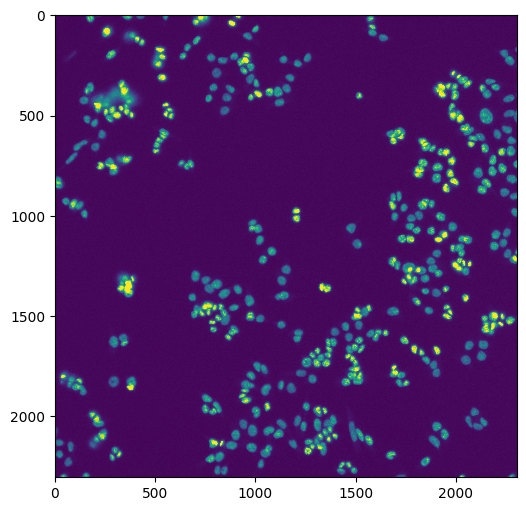

<module 'matplotlib.pyplot' from '/Library/Python/3.9/site-packages/matplotlib/pyplot.py'>

In [400]:
print(type(nd2file[0]))
matplotCreationWhole(nd2file[1])

In [377]:
nd2file.shape

(2, 2304, 2304)

In [420]:

ph_aligned = Snake._align_by_DAPI(data_1=data[0], data_2=nd2file)
save(name(description, tag='phenotype_aligned'),ph_aligned, luts=LUTS[:2])

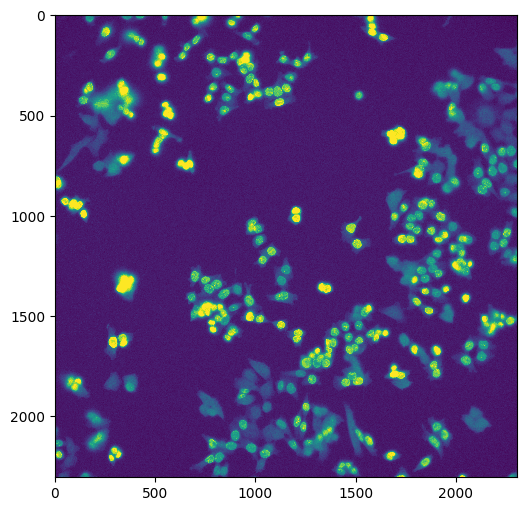

<module 'matplotlib.pyplot' from '/Library/Python/3.9/site-packages/matplotlib/pyplot.py'>

In [404]:
matplotCreationWhole(ph_aligned[0])

In [284]:
LUTS = [
    ops.io.GRAY,
    ops.io.GREEN,
    ops.io.RED,
    ops.io.MAGENTA,
    ops.io.CYAN
]

In [419]:
df_phenotype = Snake._extract_phenotype_FR(
    data_phenotype=ph_aligned,
    nuclei=nuclei,
    wildcards=WILDCARDS
)
df_phenotype.to_csv(name(description, tag='phenotype', ext='csv'), index=None)

In [348]:
print(df_phenotype)

     dapi_ha_corr  dapi_median  dapi_max  ha_median  area            i  \
0        0.883115       1913.0      2525      533.0   611     8.513912   
1        0.935570       1905.0      2554     1656.0   349     5.750716   
2        0.025125        589.0       714      153.0   422     6.298578   
3       -0.052764        581.0       716      152.0   576     7.815972   
4        0.069483        592.0       715      152.0   326     4.570552   
..            ...          ...       ...        ...   ...          ...   
597     -0.011175        591.0       724      153.0   997  2287.762287   
598      0.897322       1821.0      2244      525.0    67  2287.671642   
599      0.436603       1033.0      1183      179.5    27  2295.592593   
600     -0.006704        586.0       735      153.0   138  2300.898551   
601      0.917984       2337.0      4095      351.0   562  2297.117438   

               j  cell tile well  
0     337.345336     1    7   A1  
1     378.644699     2    7   A1  
2    1

In [421]:
#this following code does work now (02/21/23)
df_phenotype = Snake._extract_named_cell_nucleus_features(
    data=ph_aligned,
    cells=cells,
    nuclei=nuclei,
    nucleus_features=[
        'label', # required to join SBS and phenotype data
        'i',
        'j',
        'area',
        'dapi_gfp_corr',
        'dapi_max',
        'dapi_mean',
        'dapi_median',
        'gfp_max',
        'gfp_mean',
        'gfp_median',
    ],
    cell_features=['label', 'area'],
    wildcards=WILDCARDS
)
df_phenotype.to_csv(name(description, tag='phenotype', ext='csv'), index=None)

In [422]:
barcodes = pd.read_csv('barcodes.csv')
SBS_CYCLES = [1, 2, 3, 4, 5, 7, 8, 9, 10, 11, 12]
DISPLAY_RANGES = [
    [500, 15000],
    [100, 10000],
    [100, 20000],
    [100, 8000],
    [100, 6000]
]

df_combined = Snake._merge_sbs_phenotype(
    sbs_tables=df_cells, 
    phenotype_tables=df_phenotype,
    barcode_table=barcodes, 
    sbs_cycles=SBS_CYCLES
)
df_combined.to_csv(name(description, tag='combined', ext='csv'), index=None)
#mathced values found here in df_combined

In [418]:
annotate_luts = LUTS + [ops.annotate.GRMC, ops.io.GRAY]
annotate_display_ranges = [(a/4, b/4) for a,b in DISPLAY_RANGES] + [[0, 4]]
annotate_SBS = Snake._annotate_SBS(log=loged, df_reads=df_reads)
save(name(description, tag='annotate_SBS'), annotate_SBS,
     display_ranges=annotate_display_ranges, luts=annotate_luts, compress=1)

In [411]:
tifffile.imwrite('AnnotatedImage.tif', annotate_SBS)

In [352]:
# second-to-last channel annotates base calls (notches are mapped reads, pluses are unmapped reads)
# last channel encodes peaks value 
annotate_extra_luts = LUTS + [ops.annotate.GRMC, ops.io.GRAY, ops.io.GRAY]
annotate_extra_display_ranges = (
    [(a/4, b/4) for a,b in DISPLAY_RANGES]
    +[[0, 4], [0, THRESHOLD_READS*4], [0, 30]]
)
annotate_SBS_extra = Snake._annotate_SBS_extra(
    log=loged,
    peaks=peaks,
    df_reads=df_reads,
    barcode_table=barcodes,
    sbs_cycles=SBS_CYCLES
)
save(name(description, tag='annotate_SBS_extra'), annotate_SBS_extra,
     display_ranges=annotate_extra_display_ranges[1:], luts=annotate_extra_luts[1:], compress=1)

IndexError: single positional indexer is out-of-bounds

In [423]:
!pip3 freeze > requirementsEx.txt  # Python3